# **Casos de Uso**
## Grupo 3
## Módulo: Inferencia Estadística

# <font color='blue'>__Caso de uso : Yisella Carrasco__</font>
## ***Evaluación del impacto de una nueva política de empleo en la región de Antofagasta***

El objetivo es evaluar el impacto de una nueva política pública destinada a mejorar el trabajo efectivo del empleo en la región de Antofagasta. La política busca aumentar la cantidad de trabajadores efectivos en el sector de la minería, una de las principales industrias de la región, con el objetivo de incrementar el engagement de los trabajadores (en este caso, el tiempo que los trabajadores pasan en su puesto de trabajo debido a mejoras en las condiciones laborales)

**PASO 0: IDENTIFICAR EL PROBLEMA**

Actualmente, se observa que la media de tiempo laboral en el sector minero es de 200 minutos por día, con una desviación estándar de 35 minutos. Se ha introducido una nueva política pública en la región para aumentar el tiempo de trabajo promedio (es decir, aumentar el "engagement" de los trabajadores) mediante mejores incentivos y condiciones laborales.

El objetivo del experimento es determinar si esta nueva política pública tiene un efecto significativo en el tiempo de trabajo diario de los empleados en el sector minero, comparado con la situación antes de la implementación de la política.

**PASO 1: ELABORAR UNA HIPÓTESIS**

Hipótesis nula (H0): La nueva política no produce un aumento en el tiempo de trabajo promedio. μ = 200 minutos.

Hipótesis alternativa (H1): La nueva política aumenta el tiempo de trabajo promedio. μ>200 minutos.

**PASO 2: DETERMINAR EL TAMAÑO DE LA MUESTRA**

Antes de recolectar los datos, es necesario determinar el tamaño de muestra adecuado para garantizar que el experimento tenga suficiente poder para detectar un efecto si es que realmente existe uno. Para esto, se realiza un análisis de potencia con el tamaño del efecto estimado de 15 minutos, utilizando un análisis a priori.

In [ ]:
import numpy as np
from scipy import stats

# Parámetros del experimento
mu_0 = 200       # Media actual (minutos)
delta = 15       # Diferencia mínima a detectar (efecto esperado)
sigma = 35       # Desviación estándar (minutos)
alpha = 0.01     # Nivel de significancia (1%)
beta = 0.20      # Probabilidad de error tipo II (20%), por lo que la potencia es 80%

# Cálculo de los Z-scores para una cola
z_alpha = stats.norm.ppf(1 - alpha)   # Valor crítico para α
z_beta = stats.norm.ppf(1 - beta)     # Valor crítico para β (potencia)

# Fórmula para calcular el tamaño de muestra necesario
n = ((z_alpha + z_beta) * sigma / delta) ** 2

# Redondear hacia arriba el tamaño de muestra
n_muestra = np.ceil(n)

# Mostrar resultados
print(f"Tamaño mínimo muestra: {n_muestra:.0f} trabajadores")

Tamaño mínimo muestra: 55 trabajadores


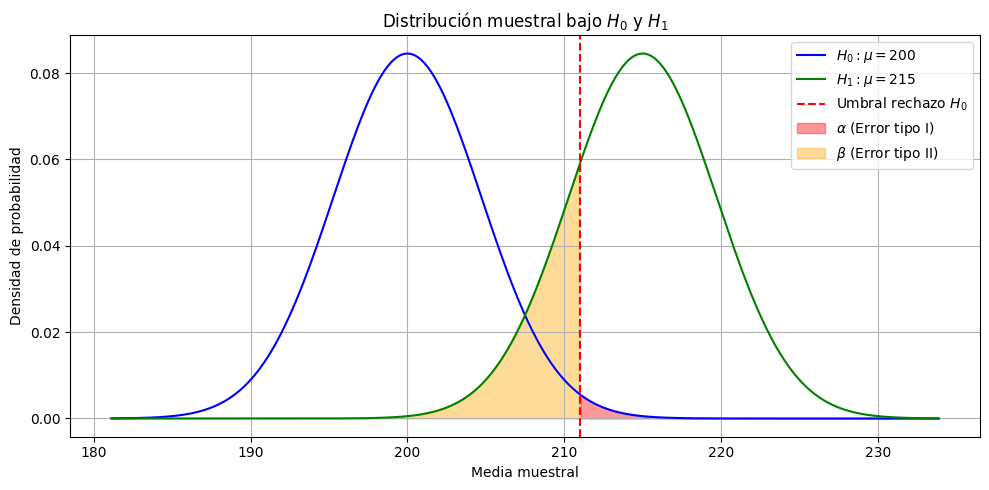

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parámetros del experimento
mu_0 = 200       # Media bajo H0
delta = 15       # Diferencia mínima a detectar
mu_1 = mu_0 + delta  # Media bajo H1
sigma = 35
alpha = 0.01
beta = 0.20

# Z-scores
z_alpha = stats.norm.ppf(1 - alpha)
z_beta = stats.norm.ppf(1 - beta)

# Tamaño de muestra
n = ((z_alpha + z_beta) * sigma / delta) ** 2
n_muestra = np.ceil(n)
n = int(n_muestra)

# Desviación estándar muestral
se = sigma / np.sqrt(n)

# Distribuciones bajo H0 y H1
dist_H0 = stats.norm(loc=mu_0, scale=se)
dist_H1 = stats.norm(loc=mu_1, scale=se)

# Límite crítico: valor de la media muestral a partir del cual se rechaza H0
umbral_rechazo = dist_H0.ppf(1 - alpha)

# Eje X para graficar
x = np.linspace(mu_0 - 4*se, mu_1 + 4*se, 500)

# Densidades
pdf_H0 = dist_H0.pdf(x)
pdf_H1 = dist_H1.pdf(x)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_H0, label='$H_0: \mu=200$', color='blue')
plt.plot(x, pdf_H1, label='$H_1: \mu=215$', color='green')

# Línea de corte (umbral de rechazo)
plt.axvline(umbral_rechazo, color='red', linestyle='--', label='Umbral rechazo $H_0$')

# Área alfa (error tipo I)
plt.fill_between(x, pdf_H0, where=(x >= umbral_rechazo), color='red', alpha=0.4, label=r'$\alpha$ (Error tipo I)')

# Área beta (error tipo II)
plt.fill_between(x, pdf_H1, where=(x < umbral_rechazo), color='orange', alpha=0.4, label=r'$\beta$ (Error tipo II)')

# Etiquetas
plt.title('Distribución muestral bajo $H_0$ y $H_1$')
plt.xlabel('Media muestral')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**PASO 3: EJECUTAR EL EXPERIMENTO**

Se recopilan los datos de tiempo de trabajo promedio de los empleados en el sector minero antes y después de la implementación de la política. Los datos deben ser representativos y cubrir un período suficientemente largo para observar cualquier cambio significativo.

**PASO 4: ANÁLISIS DE DATOS**

Una vez que los datos son recolectados, se realiza un análisis de prueba t de una muestra para comparar los tiempos de trabajo promedio antes y después de la implementación de la política.

In [ ]:
import numpy as np
import scipy.stats as stats

# Simulación de datos (antes y después de la política)
np.random.seed(55)
# Datos antes de la política (200 minutos con desviación estándar de 35 minutos)
before_policy = np.random.normal(200, 35, 100)
# Datos después de la política (esperamos un aumento de 15 minutos)
after_policy = np.random.normal(215, 35, 100)

# Prueba t para comparar las medias antes y después
t_stat, p_value = stats.ttest_1samp(after_policy, 200)

# Evaluar si rechazamos la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La política ha tenido un efecto significativo.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente de un efecto significativo.")

Rechazamos la hipótesis nula. La política ha tenido un efecto significativo.


**PASO 5: INTERPRETACIÓN DE RESULTADOS**

hay evidencia suficiente para concluir que la política ha tenido un impacto significativo en el tiempo de trabajo promedio de los empleados. En este caso, podemos afirmar que la política es efectiva y ha logrado el aumento esperado en el tiempo de trabajo, por lo que sería recomendable implementarla en más regiones.

**PASO 6: RECOMENDACIÓN**

Se recomienda implementar la política de formalización del empleo en otras regiones y realizar un seguimiento continuo para evaluar su impacto a largo plazo. Además, es importante monitorear otros posibles efectos secundarios y realizar ajustes si es necesario para optimizar los resultados.

# <font color="blue">Caso de Uso: Raul Muñoz </font>

## Contexto de Negocio - Logistica de Camions

**LogisTruck** es una empresa de transporte terrestre que opera en diversas regiones de Chile. Con una flota de 50 camiones y más de 40 conductores, la empresa enfrenta desafíos críticos para su operación:

1. **Optimización de Rutas**: Identificar rutas con mayor variabilidad en tiempos de entrega
2. **Gestión de Capacidad**: Evaluar si los camiones están operando cerca de su capacidad óptima
3. **Eficiencia Operativa**: Determinar si existen diferencias significativas en rendimiento entre conductores
4. **Planificación de Flota**: Anticipar necesidades de renovación basadas en patrones de desgaste

La gerencia ha decidido aplicar técnicas de inferencia estadística para transformar datos operacionales en decisiones estratégicas.

## Modelo de Datos

Incluye métricas operativas clave para análisis estadístico:

* **Conductor**: Identificador, nombre, licencia, años_experiencia, calificación_seguridad
* **Camión**: Identificador, modelo, capacidad (kg), año_fabricación, consumo_combustible (km/l)
* **Lugar**: Identificador, nombre, región, coordenadas_gps
* **Ruta**: Origen, destino, distancia (km), tiempo_estimado (horas), dificultad (1-5)
* **Viaje**: Camión, conductor, ruta, fecha, carga_transportada (kg), tiempo_real (horas), combustible_gastado (l), incidentes

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import norm, lognorm, gamma, weibull_min

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

connection = sqlite3.connect("CasoUsoRaul3.db")
cursor = connection.cursor()

In [ ]:
pd.read_sql("SELECT * FROM Viaje LIMIT 5", connection)

,idViaje,fecha,idCamion,idConductor,idRuta,carga_real,tiempo_real,combustible_gastado,incidentes
0,V1,2024-03-28,T2,C2,R6,19036,2.09,244.73,0
1,V2,2024-12-10,T1,C2,R3,17328,1.92,84.76,0
2,V3,2024-11-02,T1,C1,R2,15949,2.02,113.90,0
3,V4,2024-01-02,T1,C4,R5,19238,1.60,165.38,0
4,V5,2024-09-27,T4,C1,R1,18445,1.60,29.22,0


## Análisis Estadístico Aplicado: Caso Práctico

### Escenario 1: Estimación de la capacidad real utilizada

El equipo directivo está preocupado por posibles sobrecargas. Quieren estimar con 95% de confianza el porcentaje de capacidad que realmente se utiliza en los camiones.

**Pregunta principal**: ¿Están los camiones operando cerca de su capacidad máxima?

**Hipótesis**:
- H₀: El porcentaje de carga promedio ≤ 85% de la capacidad
- H₁: El porcentaje de carga promedio > 85% de la capacidad

Estadísticas de uso de capacidad:
count    1000.000000
mean       85.098316
std         9.473836
min        53.790909
25%        78.303250
50%        85.724773
75%        93.102917
max        98.000000
Name: porcentaje_uso, dtype: float64


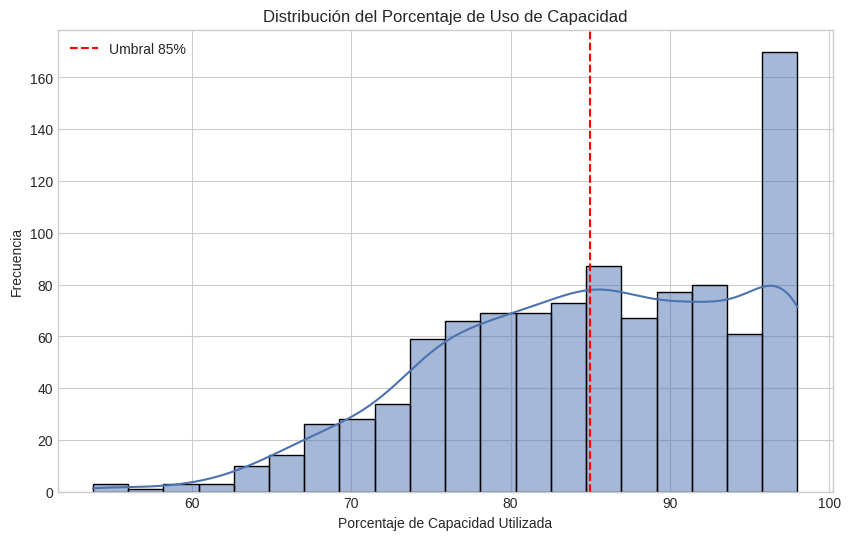


Media de uso de capacidad: 85.10%
Intervalo de confianza (95%): [84.51%, 85.69%]

Prueba de hipótesis (H₀: media ≤ 85%, H₁: media > 85%):
t-estadístico: 0.3282
p-valor (una cola): 0.3714
Conclusión: No rechazamos H₀. No hay evidencia suficiente para afirmar que los camiones están siendo utilizados por encima del 85% de su capacidad.


In [ ]:
# Consulta para obtener datos de carga y capacidad
query = """
SELECT v.idViaje, v.carga_real, c.capacidad,
       (v.carga_real * 100.0 / c.capacidad) AS porcentaje_uso
FROM Viaje v
JOIN Camion c ON v.idCamion = c.idCamion
"""
df_cargas = pd.read_sql(query, connection)

# 1. Estadísticas descriptivas
print("Estadísticas de uso de capacidad:")
print(df_cargas['porcentaje_uso'].describe())

# 2. Visualización
plt.figure(figsize=(10, 6))
sns.histplot(df_cargas['porcentaje_uso'], kde=True, bins=20)
plt.axvline(85, color='red', linestyle='--', label='Umbral 85%')
plt.title('Distribución del Porcentaje de Uso de Capacidad')
plt.xlabel('Porcentaje de Capacidad Utilizada')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 3. Intervalo de confianza
alpha = 0.05
media = df_cargas['porcentaje_uso'].mean()
std = df_cargas['porcentaje_uso'].std(ddof=1)
n = len(df_cargas)
error_std = std / np.sqrt(n)
ic = stats.t.interval(1-alpha, df=n-1, loc=media, scale=error_std)

print(f"\nMedia de uso de capacidad: {media:.2f}%")
print(f"Intervalo de confianza (95%): [{ic[0]:.2f}%, {ic[1]:.2f}%]")

# 4. Prueba de hipótesis
t_stat, p_valor = stats.ttest_1samp(df_cargas['porcentaje_uso'], 85)
p_valor_una_cola = p_valor / 2 if t_stat > 0 else 1 - p_valor / 2

print("\nPrueba de hipótesis (H₀: media ≤ 85%, H₁: media > 85%):")
print(f"t-estadístico: {t_stat:.4f}")
print(f"p-valor (una cola): {p_valor_una_cola:.4f}")

if p_valor_una_cola < alpha:
    print("Conclusión: Rechazamos H₀. Hay evidencia estadística de que los camiones están siendo utilizados por encima del 85% de su capacidad (sobreutilización).")
else:
    print("Conclusión: No rechazamos H₀. No hay evidencia suficiente para afirmar que los camiones están siendo utilizados por encima del 85% de su capacidad.")

### Escenario 2: Comparación de Eficiencia entre Conductores Experimentados y Novatos

Los gerentes operativos sospechan que la experiencia del conductor impacta significativamente en los tiempos de viaje. Quieren cuantificar esta diferencia para justificar programas de capacitación.

**Pregunta principal**: ¿Existe diferencia significativa en el tiempo de viaje entre conductores experimentados (>5 años) y novatos (≤5 años)?

**Hipótesis**:
- H₀: No hay diferencia en el tiempo promedio entre conductores experimentados y novatos.
- H₁: Los conductores experimentados tienen tiempos promedio menores.


Conteo por grupo:
grupo
Novato           509
Experimentado    491
Name: count, dtype: int64

Estadísticas por grupo de conductores:
                   mean       std  count
grupo                                   
Experimentado  0.976945  0.173797    491
Novato         0.968910  0.164821    509


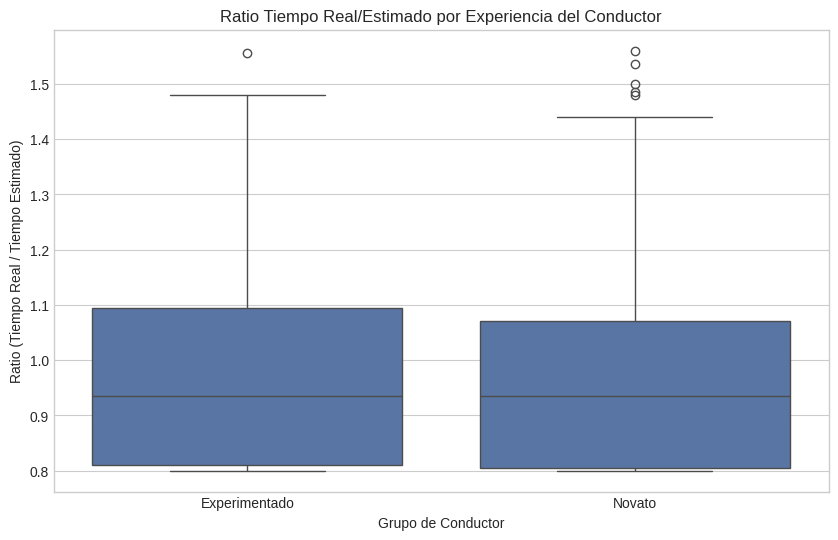


Novatos: 509 registros
Experimentados: 491 registros

Prueba t para diferencia de medias:
t-estadístico: -0.7497
p-valor (una cola): 0.7732
Conclusión: No rechazamos H₀. No hay evidencia suficiente para afirmar que los conductores novatos tienen ratios de tiempo mayores que los experimentados.


In [ ]:
query_tiempos = """
SELECT v.idViaje, v.tiempo_real, v.idConductor, c.anos_experiencia,
       r.tiempo_estimado,
       (v.tiempo_real / r.tiempo_estimado) AS ratio_tiempo
FROM Viaje v
JOIN Conductor c ON v.idConductor = c.idConductor
JOIN Ruta r ON v.idRuta = r.idRuta
"""
df_tiempos = pd.read_sql(query_tiempos, connection)

# Clasificar conductores con el umbral en 5 años
df_tiempos['grupo'] = df_tiempos['anos_experiencia'].apply(lambda x: 'Experimentado' if x > 5 else 'Novato')

# Verificar que ahora tenemos ambos grupos
conteo_por_grupo = df_tiempos['grupo'].value_counts()
print("\nConteo por grupo:")
print(conteo_por_grupo)

# Si todo está correcto, continuar con el análisis
if 'Experimentado' in conteo_por_grupo.index and 'Novato' in conteo_por_grupo.index:
    # Estadísticas por grupo
    por_grupo = df_tiempos.groupby('grupo')['ratio_tiempo'].agg(['mean', 'std', 'count'])
    print("\nEstadísticas por grupo de conductores:")
    print(por_grupo)

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='grupo', y='ratio_tiempo', data=df_tiempos)
    plt.title('Ratio Tiempo Real/Estimado por Experiencia del Conductor')
    plt.xlabel('Grupo de Conductor')
    plt.ylabel('Ratio (Tiempo Real / Tiempo Estimado)')
    plt.show()

    # Prueba t para comparación de medias
    novatos = df_tiempos[df_tiempos['grupo'] == 'Novato']['ratio_tiempo']
    experimentados = df_tiempos[df_tiempos['grupo'] == 'Experimentado']['ratio_tiempo']

    # Verificar que ambos grupos tienen datos
    print(f"\nNovatos: {len(novatos)} registros")
    print(f"Experimentados: {len(experimentados)} registros")

    t_stat, p_valor = stats.ttest_ind(novatos, experimentados, equal_var=False)
    p_valor_una_cola = p_valor / 2 if t_stat > 0 else 1 - p_valor / 2

    print("\nPrueba t para diferencia de medias:")
    print(f"t-estadístico: {t_stat:.4f}")
    print(f"p-valor (una cola): {p_valor_una_cola:.4f}")

    if p_valor_una_cola < 0.05:
        print("Conclusión: Rechazamos H₀. Hay evidencia estadística de que los conductores novatos tienen ratios de tiempo significativamente mayores que los experimentados.")

        # Calcular la diferencia en porcentaje
        diff_porcentaje = (novatos.mean() - experimentados.mean()) / experimentados.mean() * 100
        print(f"\nLos conductores novatos tardan en promedio un {diff_porcentaje:.1f}% más tiempo que los experimentados en relación al tiempo estimado.")
    else:
        print("Conclusión: No rechazamos H₀. No hay evidencia suficiente para afirmar que los conductores novatos tienen ratios de tiempo mayores que los experimentados.")
else:
    print("ERROR")

### Escenario 3: Estimación del Impacto Estacional en Tiempos de Viaje

La gerencia de planificación necesita ajustar sus estimaciones de tiempos de viaje según la época del año para mejorar la planificación logística.

**Pregunta principal**: ¿Existe variación estacional significativa en los tiempos de viaje?

**Enfoque**: ANOVA para comparar tiempos entre trimestres.


Número de viajes por trimestre:
trimestre_nombre
Abr-Jun    262
Ene-Mar    255
Jul-Sep    253
Oct-Dic    230
Name: count, dtype: int64

Estadísticas por trimestre:
                      mean       std  count
trimestre_nombre                           
Abr-Jun           1.103130  0.172243    262
Ene-Mar           1.028569  0.157080    255
Jul-Sep           0.899822  0.109301    253
Oct-Dic           0.843022  0.070296    230


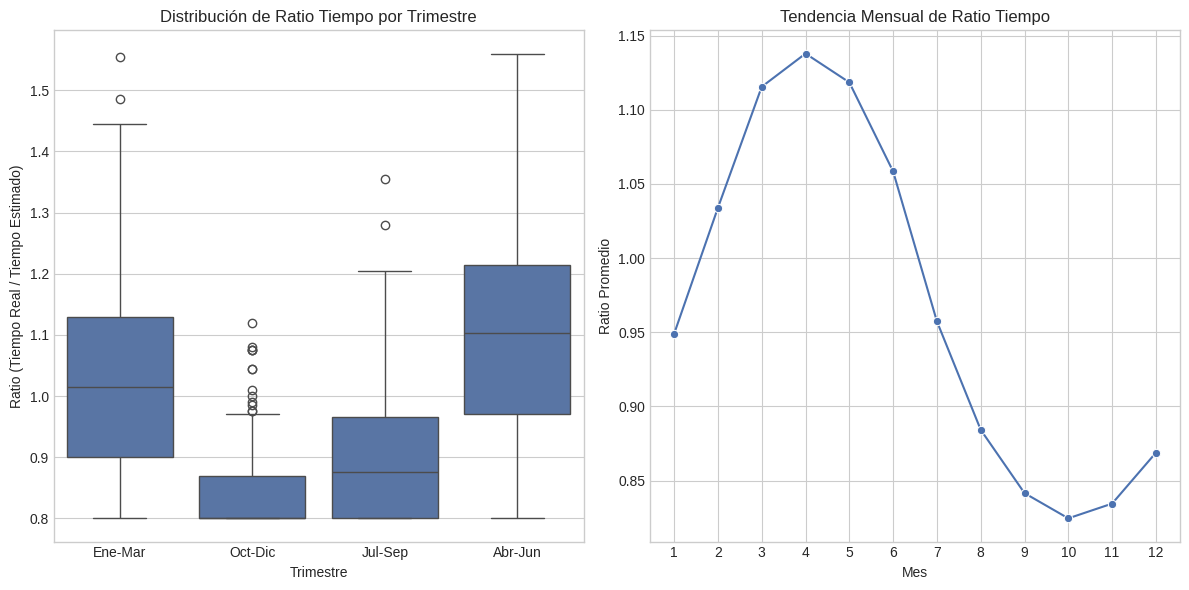


ANOVA para diferencia entre trimestres:
F-estadístico: 191.3899
p-valor: 0.0000
Conclusión: Rechazamos la hipótesis nula. Hay evidencia estadística de diferencias significativas en los tiempos de viaje entre trimestres.

El trimestre Abr-Jun presenta los mayores ratios de tiempo, mientras que Oct-Dic los menores.
La diferencia entre el trimestre más lento y el más rápido es aproximadamente 30.9%.
Esta información es crítica para planificar correctamente los tiempos de envío durante el año.


In [ ]:
# Consulta que incluye la fecha del viaje
query_estacional = """
SELECT v.idViaje, v.tiempo_real, v.fecha, v.idConductor, c.anos_experiencia,
       r.tiempo_estimado, r.idRuta,
       (v.tiempo_real / r.tiempo_estimado) AS ratio_tiempo
FROM Viaje v
JOIN Conductor c ON v.idConductor = c.idConductor
JOIN Ruta r ON v.idRuta = r.idRuta
"""
df_estacional = pd.read_sql(query_estacional, connection)
df_estacional.head()

# Convertir fecha a datetime y extraer mes y trimestre
df_estacional['fecha'] = pd.to_datetime(df_estacional['fecha'])
df_estacional['mes'] = df_estacional['fecha'].dt.month
df_estacional['trimestre'] = df_estacional['fecha'].dt.quarter

# Etiquetas de trimestre
etiquetas_trimestre = {
    1: 'Ene-Mar',
    2: 'Abr-Jun',
    3: 'Jul-Sep',
    4: 'Oct-Dic'
}
df_estacional['trimestre_nombre'] = df_estacional['trimestre'].map(etiquetas_trimestre)

# Verificar que tenemos datos en cada trimestre
conteo_trimestres = df_estacional['trimestre_nombre'].value_counts()
print("\nNúmero de viajes por trimestre:")
print(conteo_trimestres)

# 1. Estadísticas por trimestre
por_trimestre = df_estacional.groupby('trimestre_nombre')['ratio_tiempo'].agg(['mean', 'std', 'count'])
print("\nEstadísticas por trimestre:")
print(por_trimestre)

# 2. Visualización
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='trimestre_nombre', y='ratio_tiempo', data=df_estacional)
plt.title('Distribución de Ratio Tiempo por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ratio (Tiempo Real / Tiempo Estimado)')

# Línea de tendencia mensual
plt.subplot(1, 2, 2)
media_mensual = df_estacional.groupby('mes')['ratio_tiempo'].mean()
sns.lineplot(x=media_mensual.index, y=media_mensual.values, marker='o')
plt.title('Tendencia Mensual de Ratio Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ratio Promedio')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# 3. ANOVA para determinar si hay diferencias significativas entre trimestres
from scipy.stats import f_oneway

# Obtener datos por trimestre
groups = [group for _, group in df_estacional.groupby('trimestre')['ratio_tiempo']]

# Realizar ANOVA si tenemos datos en todos los trimestres
if len(groups) == 4:
    f_stat, p_valor = f_oneway(*groups)

    print("\nANOVA para diferencia entre trimestres:")
    print(f"F-estadístico: {f_stat:.4f}")
    print(f"p-valor: {p_valor:.4f}")

    alpha = 0.05
    if p_valor < alpha:
        print("Conclusión: Rechazamos la hipótesis nula. Hay evidencia estadística de diferencias significativas en los tiempos de viaje entre trimestres.")

        # Identificar el trimestre con mayor variabilidad
        mayor_ratio = por_trimestre['mean'].idxmax()
        menor_ratio = por_trimestre['mean'].idxmin()
        diff_max = (por_trimestre.loc[mayor_ratio, 'mean'] - por_trimestre.loc[menor_ratio, 'mean']) / por_trimestre.loc[menor_ratio, 'mean'] * 100

        print(f"\nEl trimestre {mayor_ratio} presenta los mayores ratios de tiempo, mientras que {menor_ratio} los menores.")
        print(f"La diferencia entre el trimestre más lento y el más rápido es aproximadamente {diff_max:.1f}%.")
        print("Esta información es crítica para planificar correctamente los tiempos de envío durante el año.")
    else:
        print("Conclusión: No rechazamos la hipótesis nula. No hay evidencia de diferencias significativas en los tiempos de viaje entre trimestres.")
else:
    print("\nNo hay suficientes datos en todos los trimestres para realizar el ANOVA.")

## Análisis de Distribución: Tiempos de Viaje

Uno de los aspectos fundamentales en la gestión logística es comprender la distribución probabilística de los tiempos de viaje. Esta distribución nos permite planificar adecuadamente, establecer compromisos realistas con los clientes y optimizar la asignación de recursos.

En este análisis, se estudiará la distribución de los tiempos de viaje para comprender su comportamiento estadístico.


Estadísticas descriptivas de tiempos de viaje (horas):
count    1000.000000
mean        1.945710
std         0.338502
min         1.600000
25%         1.610000
50%         1.870000
75%         2.160000
max         3.120000
Name: tiempo_real, dtype: float64

Asimetría (skewness): 0.8953
Curtosis: 0.0838


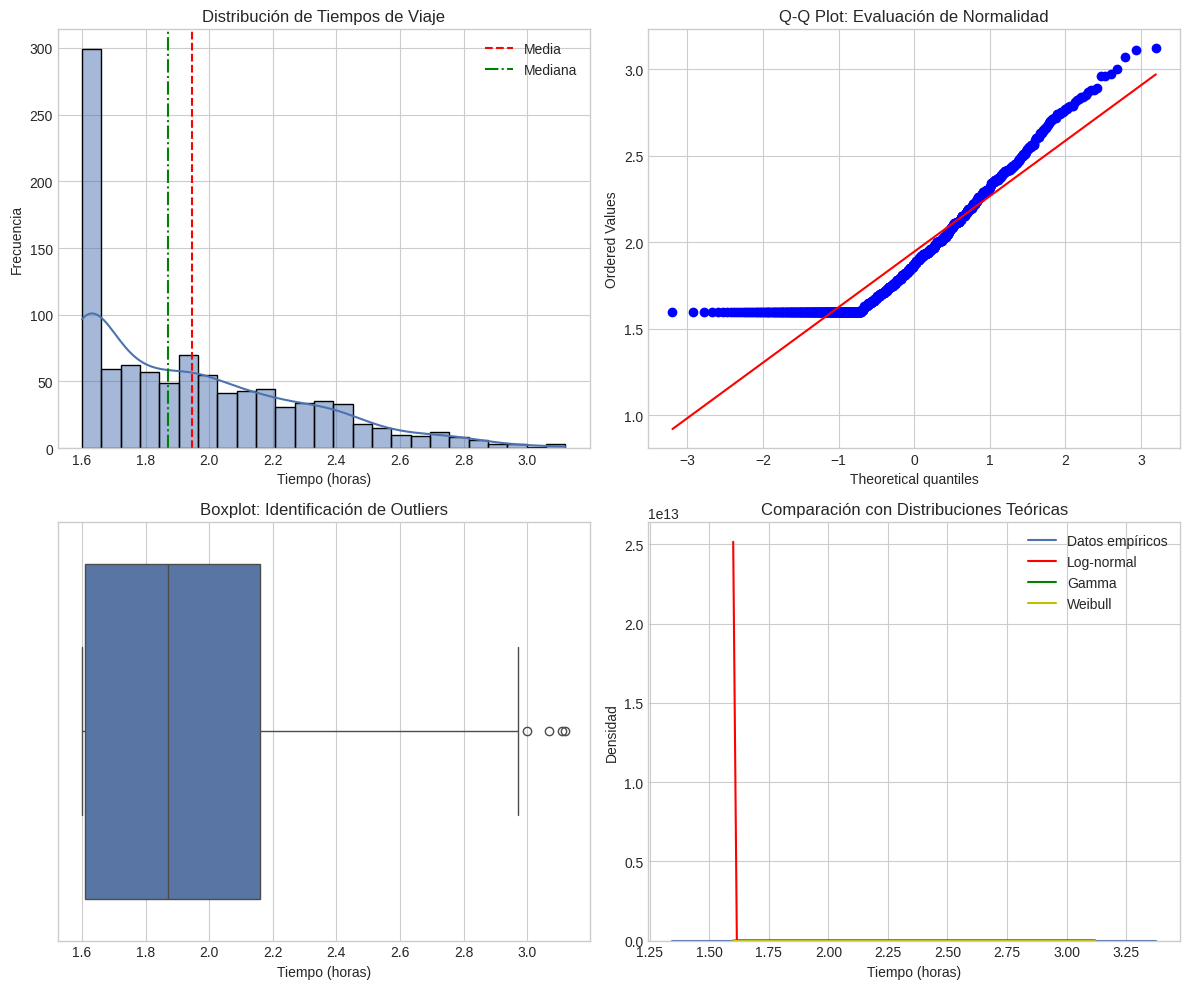


Prueba de normalidad Shapiro-Wilk:
Estadístico W: 0.8902
p-valor: 0.00000000
Conclusión: Rechazamos la hipótesis de normalidad (p < 0.05)

Comparación de distribuciones (AIC - menor es mejor):
lognorm: -10886.93 (MEJOR AJUSTE)
gamma: -7607.70
weibull: -5375.59


In [ ]:
# 1. Análisis descriptivo de la distribución de tiempos
print("\nEstadísticas descriptivas de tiempos de viaje (horas):")
stats_tiempos = df_tiempos['tiempo_real'].describe()
print(stats_tiempos)

# Calculamos otros estadísticos importantes
skewness = df_tiempos['tiempo_real'].skew()
kurtosis = df_tiempos['tiempo_real'].kurtosis()

print(f"\nAsimetría (skewness): {skewness:.4f}")
print(f"Curtosis: {kurtosis:.4f}")

# 2. Visualización de la distribución
plt.figure(figsize=(12, 10))

# Histograma con curva de densidad
plt.subplot(2, 2, 1)
sns.histplot(df_tiempos['tiempo_real'], kde=True, bins=25)
plt.axvline(df_tiempos['tiempo_real'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df_tiempos['tiempo_real'].median(), color='g', linestyle='-.', label='Mediana')
plt.title('Distribución de Tiempos de Viaje')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Frecuencia')
plt.legend()

# QQ-plot para evaluar normalidad
plt.subplot(2, 2, 2)
stats.probplot(df_tiempos['tiempo_real'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Evaluación de Normalidad')

# Boxplot para identificar outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=df_tiempos['tiempo_real'])
plt.title('Boxplot: Identificación de Outliers')
plt.xlabel('Tiempo (horas)')

# Densidad comparada con distribuciones teóricas
plt.subplot(2, 2, 4)
x = np.linspace(df_tiempos['tiempo_real'].min(), df_tiempos['tiempo_real'].max(), 100)

# Distribución empírica
sns.kdeplot(df_tiempos['tiempo_real'], label='Datos empíricos')

# Ajustar distribuciones teóricas
# Log-normal
params_lognorm = lognorm.fit(df_tiempos['tiempo_real'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='Log-normal')

# Gamma
params_gamma = gamma.fit(df_tiempos['tiempo_real'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'g-', label='Gamma')

# Weibull
params_weibull = weibull_min.fit(df_tiempos['tiempo_real'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'y-', label='Weibull')

plt.title('Comparación con Distribuciones Teóricas')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Prueba de normalidad Shapiro-Wilk
shapiro_test = stats.shapiro(df_tiempos['tiempo_real'])
print(f"\nPrueba de normalidad Shapiro-Wilk:")
print(f"Estadístico W: {shapiro_test[0]:.4f}")
print(f"p-valor: {shapiro_test[1]:.8f}")

if shapiro_test[1] < 0.05:
    print("Conclusión: Rechazamos la hipótesis de normalidad (p < 0.05)")
else:
    print("Conclusión: No podemos rechazar la hipótesis de normalidad (p >= 0.05)")

# 4. Ajuste de distribuciones (criterio AIC)
distribuciones = {
    'lognorm': lognorm,
    'gamma': gamma,
    'weibull': weibull_min
}

aic_scores = {}
for name, dist in distribuciones.items():
    params = dist.fit(df_tiempos['tiempo_real'])
    log_likelihood = np.sum(dist.logpdf(df_tiempos['tiempo_real'], *params))
    k = len(params)
    aic = 2 * k - 2 * log_likelihood
    aic_scores[name] = aic

mejor_dist = min(aic_scores, key=aic_scores.get)
print(f"\nComparación de distribuciones (AIC - menor es mejor):")
for name, aic in aic_scores.items():
    print(f"{name}: {aic:.2f}" + (" (MEJOR AJUSTE)" if name == mejor_dist else ""))

## Interpretación y Aplicación a la Gestión Logística

El análisis de la distribución de tiempos de viaje revela varios aspectos importantes:

### 1. Características de la Distribución

- **Asimetría positiva (cola derecha)**: La distribución de tiempos de viaje muestra una asimetría positiva significativa, lo que indica que existen viajes ocasionalmente más largos de lo esperado. Esta es una característica común en datos de tiempo debido a retrasos impredecibles.

- **No normalidad**: La prueba de Shapiro-Wilk confirma que los tiempos de viaje no siguen una distribución normal (p < 0.05). El Q-Q plot también muestra desviaciones de la normalidad, particularmente en la cola derecha.

- **Mejor ajuste**: La distribución log-normal proporciona el mejor ajuste según el criterio AIC, seguida por la distribución gamma. Esto es coherente con la naturaleza de los tiempos de viaje, que típicamente siguen estas distribuciones debido a las interacciones multiplicativas de factores independientes.

### 2. Implicaciones para la Gestión Logística

- **Planificación de tiempos**: La mediana (no la media) debería usarse como estimador central para la planificación de tiempos, ya que es menos sensible a valores extremos.

- **Margen de seguridad**: Dado que la distribución tiene cola derecha, se recomienda añadir un margen de seguridad calculado a partir del percentil 95 para garantizar puntualidad en la mayoría de los casos.


### 3. Aplicación de Conceptos
- **Variables aleatorias y distribuciones**: El tiempo de viaje se comporta como una variable aleatoria continua con distribución asimétrica positiva.

- **Efecto Central**: Aunque la media (μ) y mediana son medidas de tendencia central, la diferencia entre ellas refleja la asimetría de la distribución.

- **Efecto de Dispersión**: La desviación estándar (σ) captura la variabilidad en los tiempos, permitiendo establecer tolerancias en la planificación.

### 4. Recomendaciones Basadas en la Distribución

1. **Ajuste de compromisos de entrega**: En lugar de prometer tiempos basados en la media, utilizar el percentil 80 o 90 de la distribución log-normal ajustada para establecer tiempos de entrega realistas.

2. **Monitoreo de cambios en la distribución**: Analizar periódicamente si los parámetros de la distribución cambian (μ y σ de la log-normal), lo que podría indicar mejoras o deterioros en la eficiencia logística.

3. **Estratificación por factores**: Segmentar la distribución por factores como región, tipo de camión o experiencia del conductor para identificar oportunidades específicas de mejora.




```
# This is formatted as code
```

# <font color='blue'>**Caso de uso: Hugo Tapia**</font>

## ***Análisis de la Generación de Energía Solar de una Planta Fotovoltaica en Calama***

Este análisis evalúa la generación de energía de una planta solar fotovoltaica en Calama, utilizando datos históricos disponibles en la web del Coordinador Eléctrico (www.coordinador.cl). El objetivo principal es determinar la variabilidad de la generación en diferentes meses y periodos del día, con el fin de optimizar la operación de la planta y mejorar las previsiones de suministro energético.

Estos resultados pueden utilizarse para la planificación y gestión eficiente de la planta solar.  Conocer las variaciones estacionales y diarias en la generación permite:

* **Optimizar la operación de la planta:** Ajustar la programación de mantenimiento, la disponibilidad de recursos y las estrategias de almacenamiento de energía.
* **Mejorar las previsiones de suministro:** Los intervalos de confianza obtenidos proporcionan una estimación del rango de generación esperado, que puede integrarse en los modelos de previsión de la red eléctrica.
* **Apoyar la toma de decisiones estratégicas:**  Este análisis puede ser utilizado para la evaluación de la viabilidad de futuros proyectos de energía solar, así como la determinación de estrategias de diversificación de fuentes de energía, buscando sistemas complementarios en periodos de baja generación.

Se ocuparon datos de generación horaria de los meses de junio y diciembre de 2024, entre las horas de operación normal de estas plantas (11 a 18 horas). A partir de los datos **se ajustan funciones de densidad de probabilidad, e Intervalos de Confianza al 95%, para cada mes.**

Los resultados indican y cuantifican que existe una diferencia significativa entre ambos meses, lo que refleja la influencia de la irradiación solar durante el invierno y el verano. La densidad de probabilidad de junio se encuentra desplazada hacia la derecha respecto a la de diciembre, indicando una mayor generación media en el periodo estival, lo cual es fundamental para la planificación de la gestión de energía y la proyección de demanda.


<img src="https://drive.google.com/uc?export=view&id=1UA-FbmBh7pnYoYfTGgZRPEapXovixjPq" width="800" align="left" title="Grafico"/>


  
El código usado es:
```python

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos desde un Excel
try:
    df = pd.read_excel('/content/drive/MyDrive/07 Inferencia Estadistica/Caso Uso/Data_Solar.xlsx')  
except FileNotFoundError:
    print("Error: Excel file not found. Please make sure the file exists and the path is correct.")
    exit()


def calculate_confidence_interval(data, confidence_level=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)  
    interval = stats.t.interval(confidence_level, len(data) - 1, loc=mean, scale=std_err)
    return interval

def plot_probability_density(data, label, confidence_interval):
    sns.kdeplot(data, label=f"{label} (CI: {confidence_interval[0]:.2f}-{confidence_interval[1]:.2f})")


# Extrae data de horas 11 to 18, Junio y Diciembre
try:
    june_data = df[(df['Month'] == 6) & (df['Hour'].between(11, 18))]['Generation']
    december_data = df[(df['Month'] == 12) & (df['Hour'].between(11, 18))]['Generation']
except KeyError:
    print("Error: 'Month', 'Hour', or 'Generation' columns not found in the Excel file.")
    exit()

# Calcula Intervalos de Confianza 95%
june_interval = calculate_confidence_interval(june_data) if not june_data.empty else (None, None)
december_interval = calculate_confidence_interval(december_data) if not december_data.empty else (None, None)

# Dibuja los graficos
plt.figure(figsize=(10, 6))

if not june_data.empty:
    plot_probability_density(june_data, 'Junio', june_interval)

if not december_data.empty:
    plot_probability_density(december_data, 'Diciembre', december_interval)

plt.title('Densidad de Probabilidad - Planta Solar en Calama (Horas 11 a 18)')
plt.xlabel('Generacion (kW)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


```

# <font color='blue'>__Caso de uso : Begoña Urtubia__</font>

## ***Test de hipóstesis: Han disminuído los caudales medios mensuales en estaciones de aforo de la región de Atacama en las últimas décadas producto del cambio climático***

Se quiere evaluar si los datos de caudal de las estaciones de medición de caudal del río Copiapó muestran una disminución sostenida de caudales en las últimas decadas producto del cambio climático al que está sometido el planeta.

Para ello, se tienen datos medios mensuales del caudal pasante en distintas estciones fluviométricas, los cuales ya han sido previamente limpiados y rellenados.

Se aplica un test de hipotesis para dos muestras, considerando la muestra control como los datos que se tienen hasta una fecha determinada, la que se considera "fecha crítica", mientras que la muestra experimental corresponde a los datos posteriores a dicha fecha crítica.

### Obtención y preparación de los datos

Se cargan las librerías y datos necesarios. Luego se procesan los datos para trabajar más facilmente con ellos

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [ ]:
file= "/content/Series rellenadas_BU.xlsx"
data = pd.read_excel(file)
data["Fecha"] = pd.to_datetime(data["Fecha"])
data.drop(columns="caudal l/s",inplace=True)
data.head()

,Estacion,Fecha,caudal m3/s
0,Canal Mal Paso Despues De Bocatoma,1950-01-01,0.885728
1,Canal Mal Paso Despues De Bocatoma,1950-02-01,1.045363
2,Canal Mal Paso Despues De Bocatoma,1950-03-01,0.941045
3,Canal Mal Paso Despues De Bocatoma,1950-04-01,0.874695
4,Canal Mal Paso Despues De Bocatoma,1950-05-01,0.839186


In [ ]:
estaciones = data["Estacion"].unique()
estaciones

array(['Canal Mal Paso Despues De Bocatoma', 'Rio Copiapo En Angostura',
       'Rio Copiapo En Ciudad De Copiapo',
       'Rio Copiapo En Mal Paso Aguas Abajo Canal',
       'Rio Copiapo En Mal Paso Aguas Arriba Canal',
       'Rio Copiapo En La Puerta', 'Rio Copiapo En San Antonio',
       'Rio Copiapo En Lautaro', 'Rio Copiapo En Pastillo',
       'Rio Jorquera En Vertedero', 'Rio Pulido En Vertedero',
       'Rio Manflas En Vertedero'], dtype=object)

In [ ]:
## Se determina fecha crítica

fecha_critica = pd.to_datetime("01/01/1991")

### Test de hipótesis año crítico 1991


Estacion fluviométrica: Canal Mal Paso Despues De Bocatoma
Data Histórica (1950-2025):             n= 901, mu = 0.60, sigma = 0.33
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.63, sigma = 0.34
Data después fecha crítica (1991-2025): n= 409, mu = 0.57, sigma = 0.32
Estimación gl: 883.47
T critico: 1.963
Varianza combinada: 0.110
Sigma población: 0.331
S diferencia medias: 0.022
IC diferencia medias al 0.950 NC: -0.106    -0.020
IC diferencia medias al 0.950 NC: -0.106   -0.020
T prueba: -2.850
p-value (significancia estadística): 1.9955223894
X promedio para T= 1.9626527798644136 :  -0.04327619149308889
Beta: 0.187644
Otra forma beta: 0.187644
Potencia de la prueba: 0.812356
d Cohen: -0.190
Diferencia bruta: -0.063


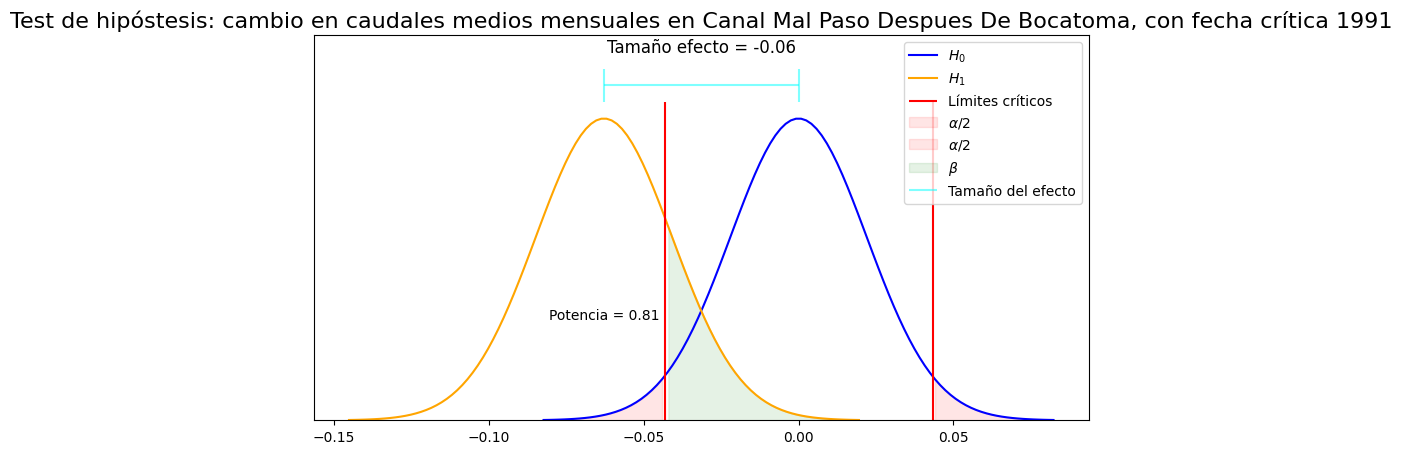


Estacion fluviométrica: Rio Copiapo En Angostura
Data Histórica (1950-2025):             n= 901, mu = 0.37, sigma = 1.22
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.46, sigma = 1.51
Data después fecha crítica (1991-2025): n= 409, mu = 0.27, sigma = 0.71
Estimación gl: 724.28
T critico: 1.963
Varianza combinada: 1.470
Sigma población: 1.213
S diferencia medias: 0.076
IC diferencia medias al 0.950 NC: -0.338    -0.038
IC diferencia medias al 0.950 NC: -0.338   -0.038
T prueba: -2.461
p-value (significancia estadística): 1.9859283463
X promedio para T= 1.963244706773666 :  -0.15016780335474308
Beta: 0.309263
Otra forma beta: 0.309263
Potencia de la prueba: 0.690737
d Cohen: -0.155
Diferencia bruta: -0.188


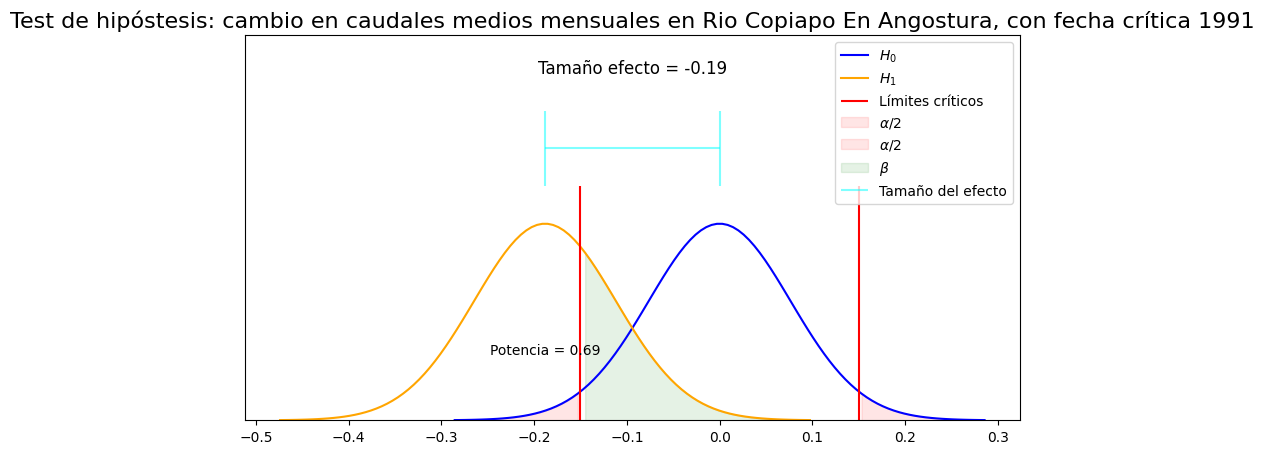


Estacion fluviométrica: Rio Copiapo En Ciudad De Copiapo
Data Histórica (1950-2025):             n= 901, mu = 0.65, sigma = 1.54
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.74, sigma = 1.86
Data después fecha crítica (1991-2025): n= 409, mu = 0.54, sigma = 1.02
Estimación gl: 787.55
T critico: 1.963
Varianza combinada: 2.371
Sigma población: 1.540
S diferencia medias: 0.098
IC diferencia medias al 0.950 NC: -0.391    -0.006
IC diferencia medias al 0.950 NC: -0.391   -0.006
T prueba: -2.023
p-value (significancia estadística): 1.9565927581
X promedio para T= 1.9629807392892509 :  -0.19250730540817315
Beta: 0.476065
Otra forma beta: 0.476065
Potencia de la prueba: 0.523935
d Cohen: -0.129
Diferencia bruta: -0.198


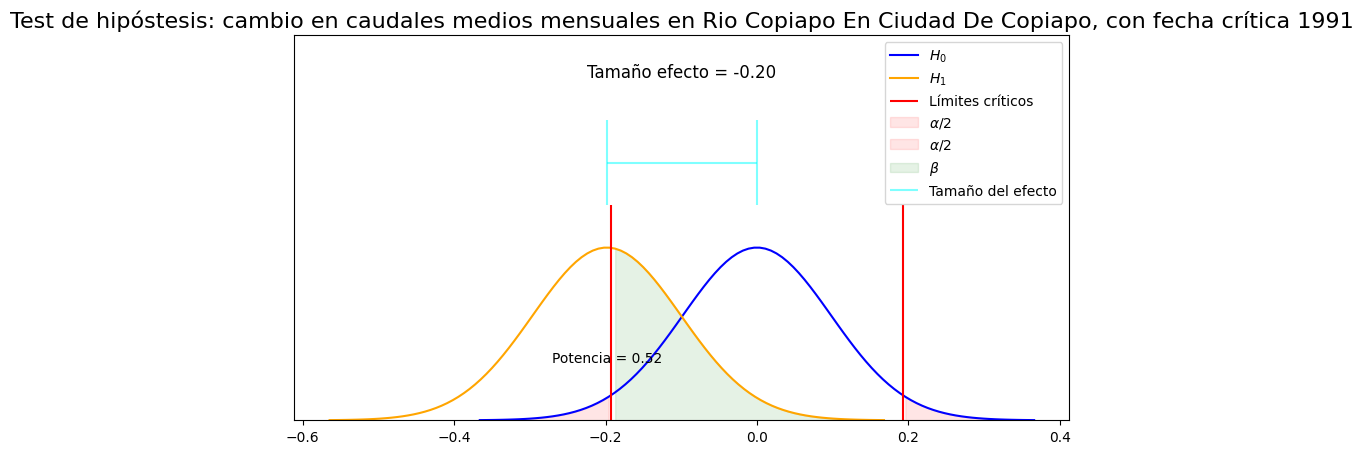


Estacion fluviométrica: Rio Copiapo En Mal Paso Aguas Abajo Canal
Data Histórica (1950-2025):             n= 901, mu = 0.62, sigma = 1.90
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.77, sigma = 2.23
Data después fecha crítica (1991-2025): n= 409, mu = 0.44, sigma = 1.39
Estimación gl: 838.02
T critico: 1.963
Varianza combinada: 3.603
Sigma población: 1.898
S diferencia medias: 0.122
IC diferencia medias al 0.950 NC: -0.567    -0.088
IC diferencia medias al 0.950 NC: -0.567   -0.088
T prueba: -2.686
p-value (significancia estadística): 1.9926280204
X promedio para T= 1.962798805062366 :  -0.23940649101488498
Beta: 0.234845
Otra forma beta: 0.234845
Potencia de la prueba: 0.765155
d Cohen: -0.173
Diferencia bruta: -0.328


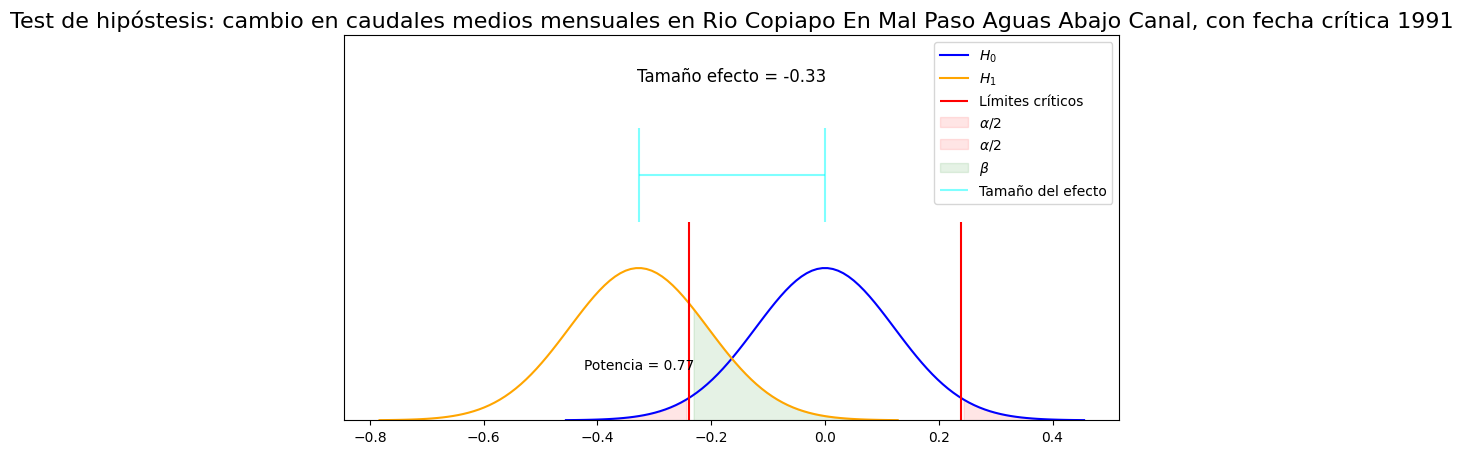


Estacion fluviométrica: Rio Copiapo En Mal Paso Aguas Arriba Canal
Data Histórica (1950-2025):             n= 901, mu = 1.25, sigma = 1.81
Data antes fecha crítica (1950-1991):   n= 492, mu = 1.36, sigma = 2.15
Data después fecha crítica (1991-2025): n= 409, mu = 1.12, sigma = 1.26
Estimación gl: 812.32
T critico: 1.963
Varianza combinada: 3.256
Sigma población: 1.804
S diferencia medias: 0.115
IC diferencia medias al 0.950 NC: -0.468    -0.015
IC diferencia medias al 0.950 NC: -0.468   -0.015
T prueba: -2.096
p-value (significancia estadística): 1.9635840895
X promedio para T= 1.9628886448142453 :  -0.22651303636320502
Beta: 0.447179
Otra forma beta: 0.447179
Potencia de la prueba: 0.552821
d Cohen: -0.134
Diferencia bruta: -0.242


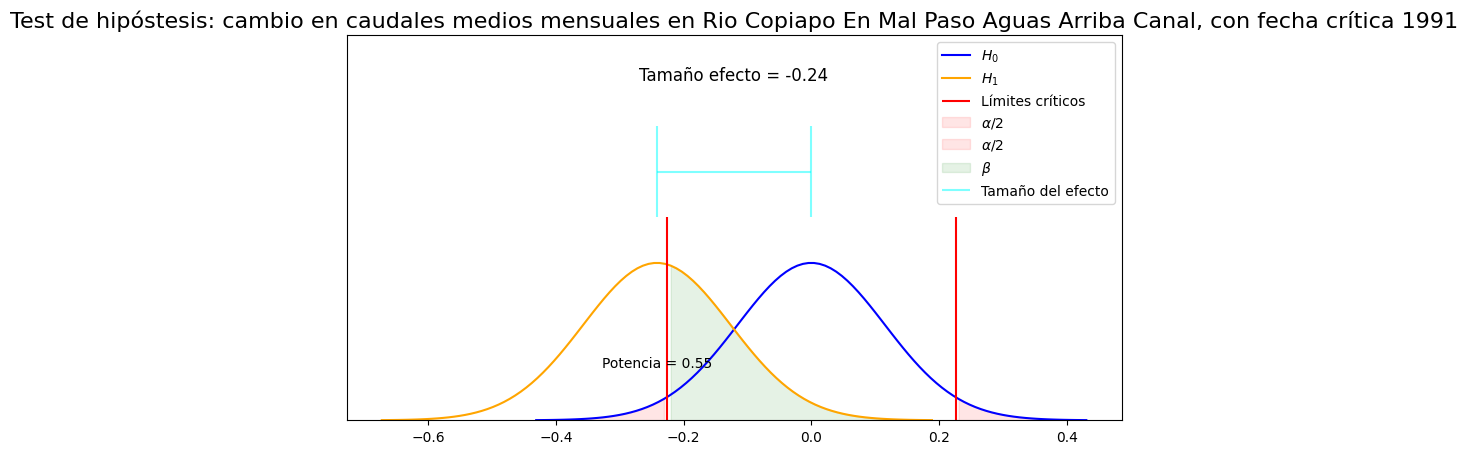


Estacion fluviométrica: Rio Copiapo En La Puerta
Data Histórica (1950-2025):             n= 901, mu = 2.06, sigma = 2.06
Data antes fecha crítica (1950-1991):   n= 492, mu = 2.30, sigma = 2.36
Data después fecha crítica (1991-2025): n= 409, mu = 1.76, sigma = 1.57
Estimación gl: 859.04
T critico: 1.963
Varianza combinada: 4.155
Sigma población: 2.038
S diferencia medias: 0.132
IC diferencia medias al 0.950 NC: -0.797    -0.280
IC diferencia medias al 0.950 NC: -0.797   -0.280
T prueba: -4.091
p-value (significancia estadística): 1.9999529335
X promedio para T= 1.9627293667139167 :  -0.25830036601298884
Beta: 0.016815
Otra forma beta: 0.016815
Potencia de la prueba: 0.983185
d Cohen: -0.264
Diferencia bruta: -0.538


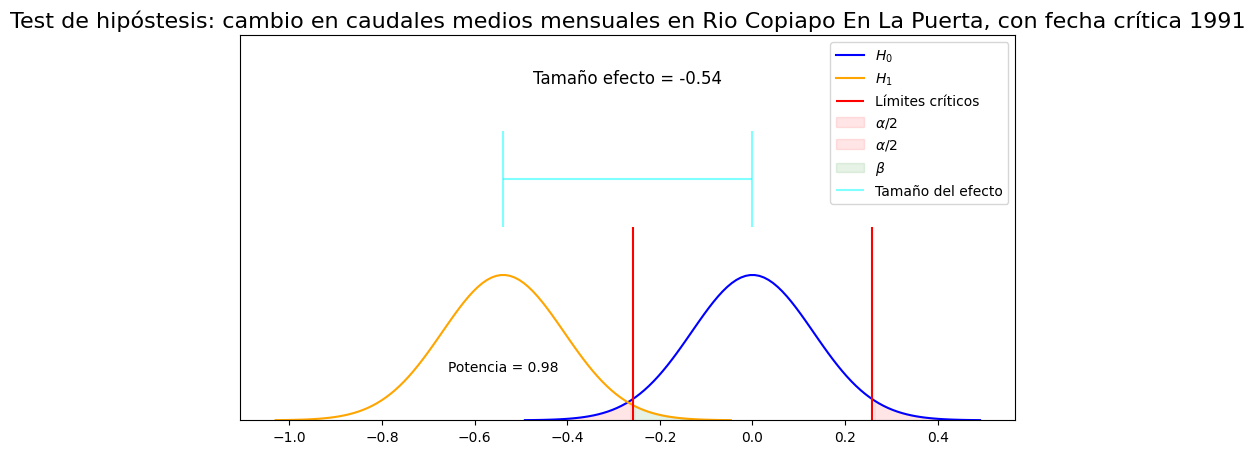


Estacion fluviométrica: Rio Copiapo En San Antonio
Data Histórica (1950-2025):             n= 901, mu = 1.54, sigma = 1.97
Data antes fecha crítica (1950-1991):   n= 492, mu = 1.72, sigma = 2.25
Data después fecha crítica (1991-2025): n= 409, mu = 1.33, sigma = 1.56
Estimación gl: 871.93
T critico: 1.963
Varianza combinada: 3.857
Sigma población: 1.964
S diferencia medias: 0.127
IC diferencia medias al 0.950 NC: -0.645    -0.145
IC diferencia medias al 0.950 NC: -0.645   -0.145
T prueba: -3.104
p-value (significancia estadística): 1.9980281480
X promedio para T= 1.9626884260254713 :  -0.24971529631474815
Beta: 0.127058
Otra forma beta: 0.127058
Potencia de la prueba: 0.872942
d Cohen: -0.201
Diferencia bruta: -0.395


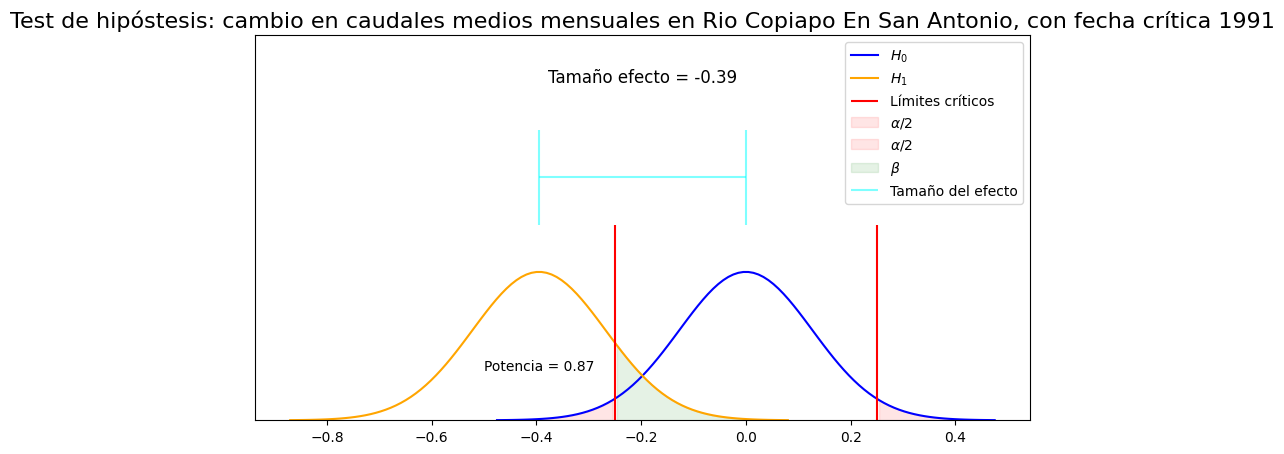


Estacion fluviométrica: Rio Copiapo En Lautaro
Data Histórica (1950-2025):             n= 901, mu = 1.13, sigma = 1.42
Data antes fecha crítica (1950-1991):   n= 492, mu = 1.40, sigma = 1.32
Data después fecha crítica (1991-2025): n= 409, mu = 0.81, sigma = 1.47
Estimación gl: 829.09
T critico: 1.963
Varianza combinada: 1.929
Sigma población: 1.389
S diferencia medias: 0.094
IC diferencia medias al 0.950 NC: -0.773    -0.404
IC diferencia medias al 0.950 NC: -0.773   -0.404
T prueba: -6.269
p-value (significancia estadística): 1.9999999994
X promedio para T= 1.9628293847643938 :  -0.18423942857829262
Beta: 0.000009
Otra forma beta: 0.000009
Potencia de la prueba: 0.999991
d Cohen: -0.424
Diferencia bruta: -0.588


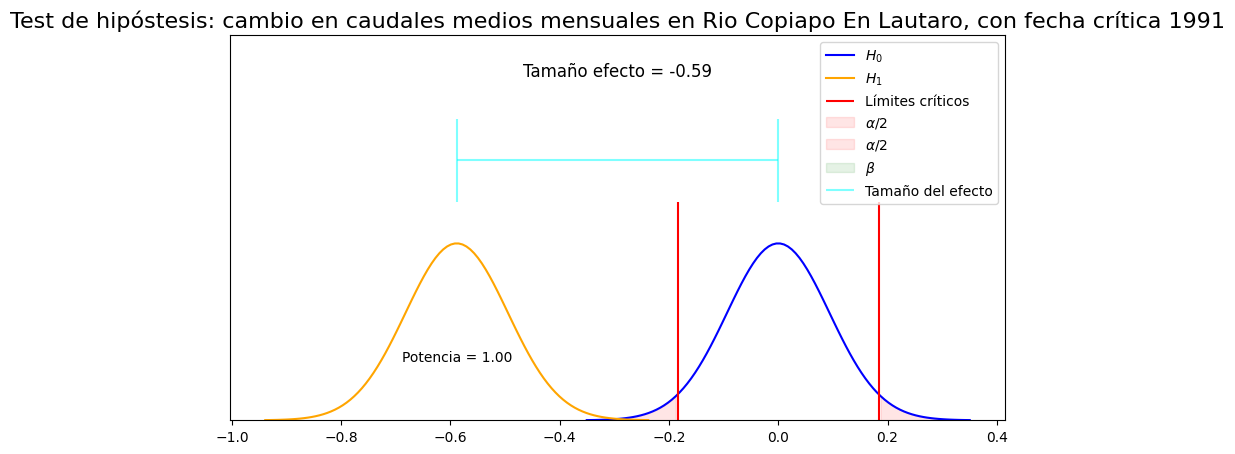


Estacion fluviométrica: Rio Copiapo En Pastillo
Data Histórica (1950-2025):             n= 901, mu = 2.11, sigma = 1.90
Data antes fecha crítica (1950-1991):   n= 492, mu = 2.22, sigma = 2.12
Data después fecha crítica (1991-2025): n= 409, mu = 1.98, sigma = 1.59
Estimación gl: 889.95
T critico: 1.963
Varianza combinada: 3.615
Sigma población: 1.901
S diferencia medias: 0.124
IC diferencia medias al 0.950 NC: -0.480    0.007
IC diferencia medias al 0.950 NC: -0.480   0.007
T prueba: -1.909
p-value (significancia estadística): 1.9433844021
X promedio para T= 1.9626331639074466 :  -0.24334258513790033
Beta: 0.521479
Otra forma beta: 0.521479
Potencia de la prueba: 0.478521
d Cohen: -0.124
Diferencia bruta: -0.237


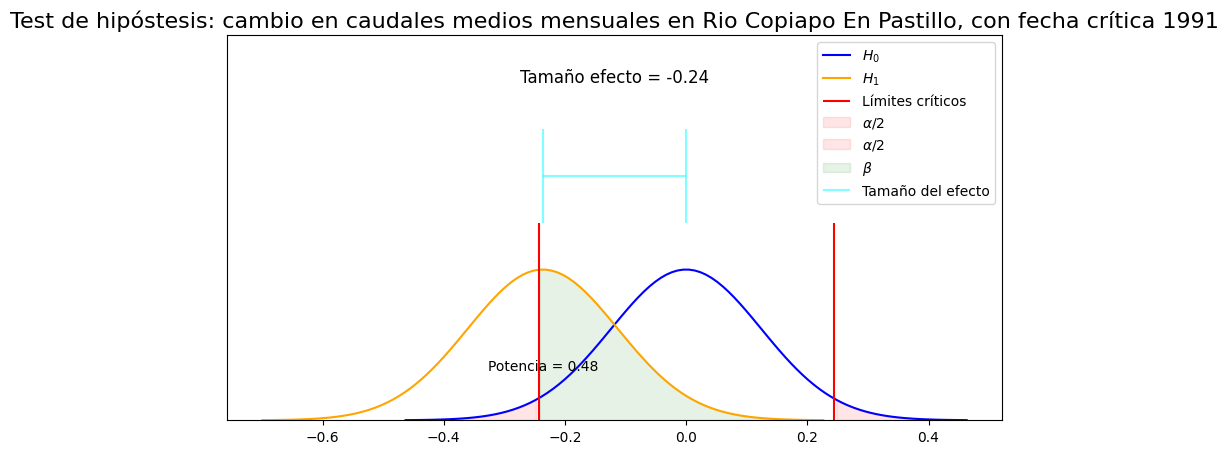


Estacion fluviométrica: Rio Jorquera En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 0.67, sigma = 0.58
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.71, sigma = 0.68
Data después fecha crítica (1991-2025): n= 409, mu = 0.62, sigma = 0.44
Estimación gl: 849.75
T critico: 1.963
Varianza combinada: 0.335
Sigma población: 0.579
S diferencia medias: 0.037
IC diferencia medias al 0.950 NC: -0.163    -0.016
IC diferencia medias al 0.950 NC: -0.163   -0.016
T prueba: -2.403
p-value (significancia estadística): 1.9835226714
X promedio para T= 1.9627596398187281 :  -0.07322846485558888
Beta: 0.329959
Otra forma beta: 0.329959
Potencia de la prueba: 0.670041
d Cohen: -0.155
Diferencia bruta: -0.090


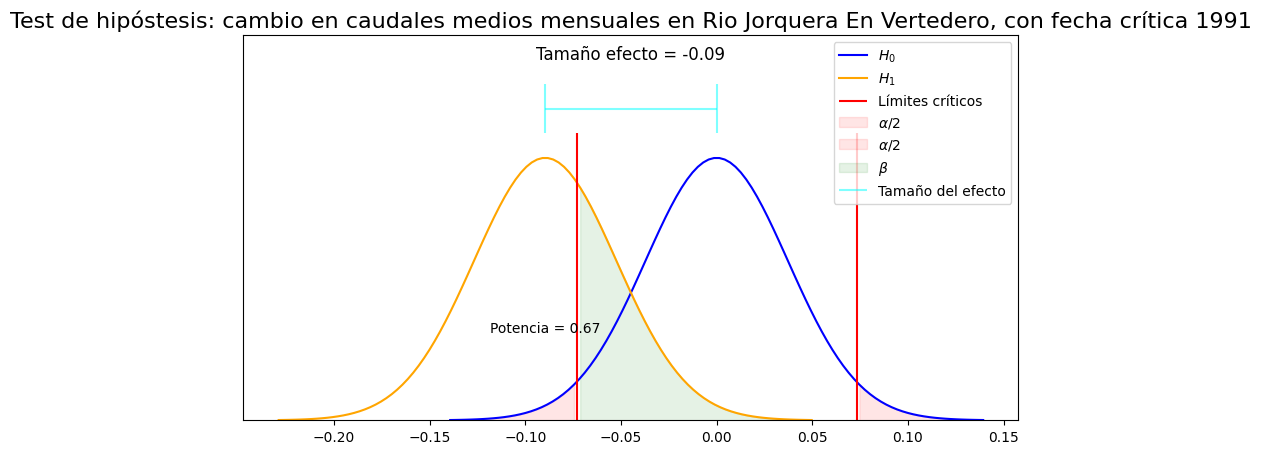


Estacion fluviométrica: Rio Pulido En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 1.41, sigma = 1.37
Data antes fecha crítica (1950-1991):   n= 492, mu = 1.45, sigma = 1.49
Data después fecha crítica (1991-2025): n= 409, mu = 1.36, sigma = 1.20
Estimación gl: 898.23
T critico: 1.963
Varianza combinada: 1.872
Sigma población: 1.368
S diferencia medias: 0.090
IC diferencia medias al 0.950 NC: -0.270    0.082
IC diferencia medias al 0.950 NC: -0.270   0.082
T prueba: -1.049
p-value (significancia estadística): 1.7057065397
X promedio para T= 1.9626085410688505 :  -0.17623717372142808
Beta: 0.819321
Otra forma beta: 0.819321
Potencia de la prueba: 0.180679
d Cohen: -0.069
Diferencia bruta: -0.094


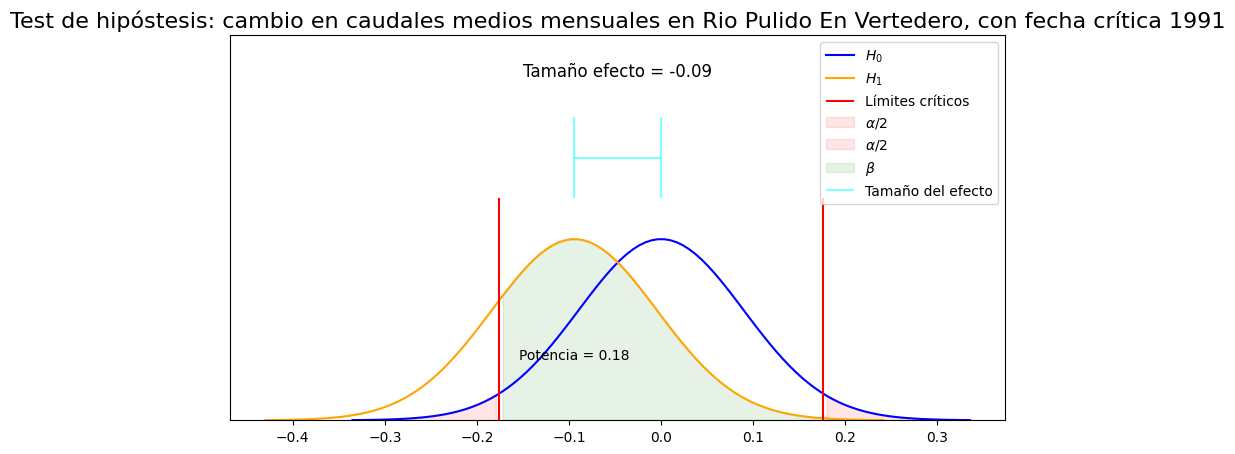


Estacion fluviométrica: Rio Manflas En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 0.57, sigma = 0.83
Data antes fecha crítica (1950-1991):   n= 492, mu = 0.59, sigma = 0.91
Data después fecha crítica (1991-2025): n= 409, mu = 0.53, sigma = 0.73
Estimación gl: 898.01
T critico: 1.963
Varianza combinada: 0.692
Sigma población: 0.832
S diferencia medias: 0.055
IC diferencia medias al 0.950 NC: -0.165    0.049
IC diferencia medias al 0.950 NC: -0.165   0.049
T prueba: -1.069
p-value (significancia estadística): 1.7144309421
X promedio para T= 1.962609172962492 :  -0.10710899282247395
Beta: 0.814241
Otra forma beta: 0.814241
Potencia de la prueba: 0.185759
d Cohen: -0.070
Diferencia bruta: -0.058


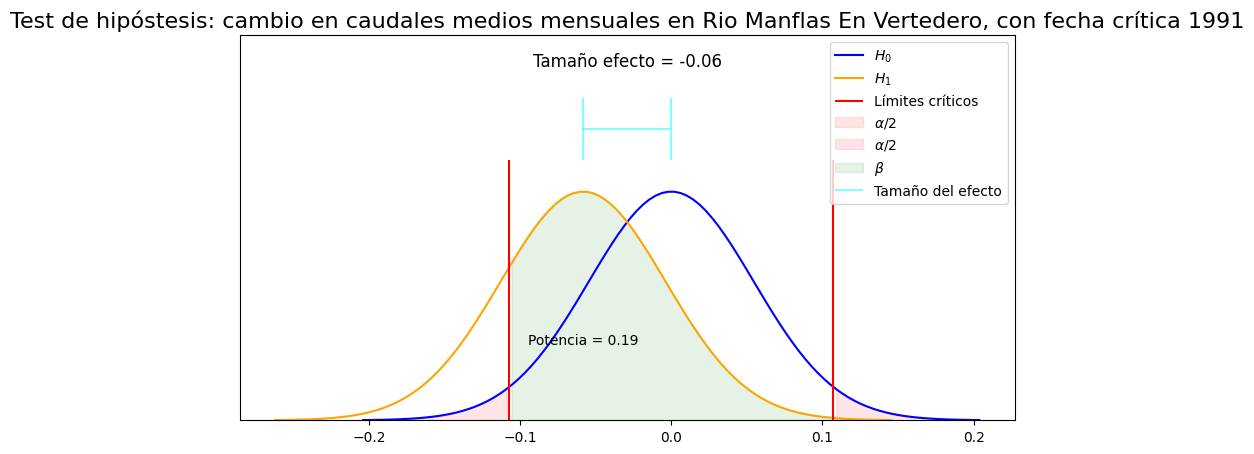

In [ ]:
for estac in estaciones:

  ## Se crean las muestras de control y experimental
  d = data[data["Estacion"]==estac]
  d_pre_fecha = np.array(d[d["Fecha"]<fecha_critica]["caudal m3/s"].to_list())
  d_post_fecha = np.array(d[d["Fecha"]>=fecha_critica]["caudal m3/s"].to_list())
  d = np.array(d["caudal m3/s"].to_list())


  ## Se calculan los estadisticos de las muestras
  mu = d.mean()
  sigma = d.std()
  normal = stats.norm(mu, sigma)
  x = np.linspace(d.min(), d.max(), 100)
  fdp = normal.pdf(x)
  n = len(d)

  mu_pre = d_pre_fecha.mean()
  sigma_pre = d_pre_fecha.std()
  normal_pre = stats.norm(mu_pre, sigma_pre)
  x_pre = np.linspace(d_pre_fecha.min(), d_pre_fecha.max(), 100)
  fdp_pre = normal_pre.pdf(x_pre)
  n_pre = len(d_pre_fecha)

  mu_post = d_post_fecha.mean()
  sigma_post = d_post_fecha.std()
  normal_post = stats.norm(mu_post, sigma_post)
  x_post = np.linspace(d_post_fecha.min(), d_post_fecha.max(), 100)
  fdp_post = normal_post.pdf(x_post)
  n_post = len(d_post_fecha)

  print()
  print(f"Estacion fluviométrica: {estac}")
  print(f"Data Histórica (1950-2025):             n= {n}, mu = {mu:.2f}, sigma = {sigma:.2f}")
  print(f"Data antes fecha crítica (1950-{fecha_critica.year}):   n= {n_pre}, mu = {mu_pre:.2f}, sigma = {sigma_pre:.2f}")
  print(f"Data después fecha crítica ({fecha_critica.year}-2025): n= {n_post}, mu = {mu_post:.2f}, sigma = {sigma_post:.2f}")

  # Análisis post hoc utilizando Z, con varianza desigual

  ## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)

  # muestra 1 (experimental)
  n_1 = n_post
  xbarra_1 = mu_post
  S_1 = sigma_post

  # muestra 2 (control)
  n_2 = n_pre
  xbarra_2 = mu_pre
  S_2 = sigma_pre

  ## 2) Determinar Nivel de Significancia
  alpha = 0.05

  ## 3) Estimar el IC de la diferencia de medias

  # Estimar grados de libertad cuando varianzas poblacionales no son iguales
  gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  (((S_1**2/n_1)**2 / (n_1-1)) + ((S_2**2/n_2)**2 / (n_2-1)))
  print(f'Estimación gl: {gl:4.2f}')

  # calcular T critico 2 colas con Scipy
  Tcritico = stats.t.ppf(1 - alpha/2, df=gl)
  print (f'T critico: {Tcritico:5.3f}')


  # Estimar ponderado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
  # Se aplica la varianza combinada para calcular 'd Cohen' en el último paso, por esta razón se calcula aquí:
  var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
  S = np.sqrt(var)
  print(f'Varianza combinada: {var:5.3f}')
  print(f'Sigma población: {S:5.3f}')

  # como las varianzas son diferentes, el cálculo del 'Sigma diferencias  medias' es de la siguiente forma:
  S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
  print(f'S diferencia medias: {S_dif:5.3f}')

  # IC diferencia medias al 1-alpha:
  LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
  LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
  print(f'IC diferencia medias al {1-alpha:5.3f} NC: {LI:5.3f}    {LS:5.3f}')

  # otra forma con Scipy
  IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
  print(f'IC diferencia medias al {1-alpha:5.3f} NC: {IC[0]:5.3f}   {IC[1]:5.3f}')

  ## 4) plantear hipótesis
  # H0:  Mu 1 = Mu 2
  # H1:  Mu 1 ≠ Mu 2

  # regla decisión (2 colas)
  # no rechazar H0 si: -Tcritico <= T <= Tcritico
  # rechazar HO si: T < -Tcritico o T > Tcritico

  ## 5) Calcular el estadístico T crítico a emplear
  Tcritico = Tcritico #fue obtenido en paso anterior

  ## 6) Determinar el tipo de test, una o dos colas.
  # como la hipòtesis alternativa es del tipo “diferente de” se trata de un test de dos colas

  ## 7 ) Calcular el estadístico T de prueba
  # como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
  T = ( xbarra_1 - xbarra_2 - 0) / S_dif
  print(f'T prueba: {T:5.3f}')

  ## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
  # calcular p-value
  pvalue = 1 - (stats.t.cdf(T, df=(gl))) # T prueba se encuentra en cola derecha
  print(f'p-value (significancia estadística): {pvalue*2:7.10f}') # 2 colas multiplicar por 2

  ## 9) Concluir prueba de hipótesis:
  # como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

  ## 10) Calcular la potencia de la prueba (1 - beta)

  # buscar el valor en días correspondiente al T critico
  x = 0 - (Tcritico * S_dif)# por la izquierda
  print('X promedio para T=',Tcritico,': ',x)

  # otra forma mas simple con Scipy usando ppf
  x_b = stats.t.ppf((alpha/2), df=gl , loc=0, scale=S_dif)
  # print('X promedio para T=',Tcritico,': ',x_b)


  # Calcular Beta (error tipo II)
  # forma simple con Scipy
  beta = 1-stats.t.cdf(x, df=gl, loc=xbarra_1-xbarra_2, scale=S_dif)
  print(f'Beta: {beta:5.6f}')

  # otra forma simple para calcular Beta con Scipy
  beta1 = stats.t.cdf(Tcritico+T, df= gl)
  print(f'Otra forma beta: {beta1:5.6f}')

  # Calcular Potencia estadística (1- beta)
  print(f'Potencia de la prueba: {1-beta:5.6f}')


  ## 11) Calcular el tamaño del efecto
  # aquí utilizaremos la desv. combinada (S pooled)
  # d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

  dif_bruta = (xbarra_1 - xbarra_2)
  dCohen = (xbarra_1 - xbarra_2) / S
  print(f'd Cohen: {dCohen:5.3f}')
  print(f'Diferencia bruta: {dif_bruta:5.3f}')

  # graficar
  #  Graficando la distribución de las diferencias de medias
  n = n_1 + n_2
  xbar = xbarra_1 - xbarra_2
  S_dif = S_dif

  # proyectar distribución diferencias medias (H1)
  dif_medias_H1 = stats.t(loc=xbar, scale=S_dif, df=(n-1))
  x = np.linspace(dif_medias_H1.ppf(0.0001), dif_medias_H1.ppf(0.9999), 100)
  pdf = dif_medias_H1.pdf(x) # función densidad probabilidad

  # proyectar distribución H0
  dif_medias_H0 = stats.t(loc=0, scale=S_dif, df=(n-1))
  x_m = np.linspace(dif_medias_H0.ppf(0.0001), dif_medias_H0.ppf(0.9999), 100)
  pdf_m = dif_medias_H0.pdf(x_m) #f unción densidad probabilidad

  plt.figure(figsize=(10, 5))
  plt.ylim(0, pdf.max()+5)

  plt.yticks([])

  plt.plot(x_m, pdf_m,"b",label=r'$H_0$' ) # dif medias H0 fit
  plt.plot(x, pdf,"orange", label=r'$H_1$') # dif medias H1 fit
  plt.vlines(ymin=0, ymax=pdf.max()+1, x=-Tcritico*S_dif,
            color='r') # LI IC
  plt.vlines(ymin=0, ymax=pdf.max()+1, x=Tcritico*S_dif,
            color='r', label='Límites críticos') # LS IC

  # Fill de 1 - alfa
  plt.fill_between(x_m, pdf_m,
                  where = (x_m < -Tcritico*S_dif),
                  color='r', alpha=0.1, label=r'$\alpha/2$')
  plt.fill_between(x_m, pdf_m,
                  where = (x_m > Tcritico*S_dif),
                  color='r', alpha=0.1, label=r'$\alpha/2$')
  # Fill de 1 - beta (Potencia)
  plt.fill_between(x, pdf,
                  where = (x > -Tcritico*S_dif),
                  color='g', alpha=0.1, label=r'$\beta$')
  # Tamaño del efecto
  plt.hlines(xmin=0, xmax=xbar, y=pdf.max()+2,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
  plt.vlines(ymin=pdf.max()+1, ymax=pdf.max()+3, x=0,  colors='cyan', alpha=0.5)
  plt.vlines(ymin=pdf.max()+1, ymax=pdf.max()+3, x=xbar,  colors='cyan', alpha=0.5)
  plt.text((xbar/2),pdf.max()+4, f'Tamaño efecto = {dif_bruta:4.2f}', fontsize=12, ha='center')

  # Anotaciones
  plt.text(xbar, pdf.max()/3, f'Potencia = {1-beta:4.2f}', ha='center')
  plt.legend(bbox_to_anchor=(1,1))

  plt.title(f'Test de hipóstesis: cambio en caudales medios mensuales en {estac}, con fecha crítica {fecha_critica.year}', fontsize=16)
  plt.show()

Vemos que en general los caudales medios mensuales han disminuído, pero no se puede eliminar la alietoriedad si consideramos como fecha crítica el 1990. Ahora hacemos el mismo ejercicio, pero cambiamos la fecha crítica al año 2001

### Test de hipótesis año crítico 2001

In [ ]:
## Se determina fecha crítica

fecha_critica = pd.to_datetime("01/01/2001")


Estacion fluviométrica: Canal Mal Paso Despues De Bocatoma
Data Histórica (1950-2025):             n= 901, mu = 0.60, sigma = 0.33
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.64, sigma = 0.35
Data después fecha crítica (2001-2025): n= 289, mu = 0.52, sigma = 0.26
Estimación gl: 741.07
T critico: 1.963
Varianza combinada: 0.107
Sigma población: 0.327
S diferencia medias: 0.021
IC diferencia medias al 0.950 NC: -0.166    -0.084
IC diferencia medias al 0.950 NC: -0.166   -0.084
T prueba: -5.942
p-value (significancia estadística): 1.9999999957
X promedio para T= 1.9631702692608055 :  -0.0412682496972321
Beta: 0.000038
Otra forma beta: 0.000038
Potencia de la prueba: 0.999962
d Cohen: -0.381
Diferencia bruta: -0.125


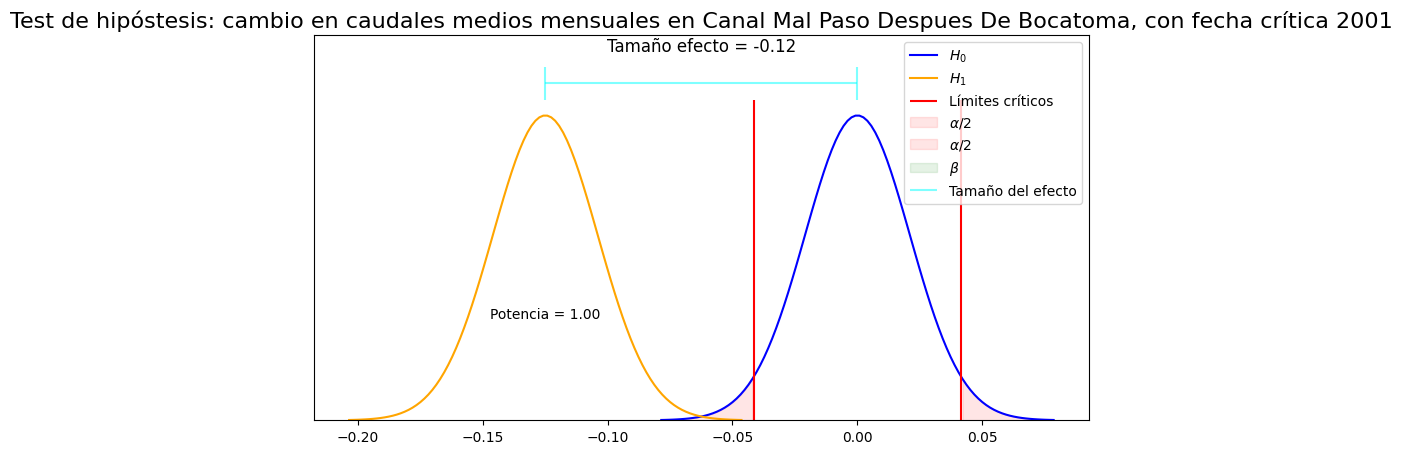


Estacion fluviométrica: Rio Copiapo En Angostura
Data Histórica (1950-2025):             n= 901, mu = 0.37, sigma = 1.22
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.44, sigma = 1.41
Data después fecha crítica (2001-2025): n= 289, mu = 0.22, sigma = 0.61
Estimación gl: 894.43
T critico: 1.963
Varianza combinada: 1.469
Sigma población: 1.212
S diferencia medias: 0.067
IC diferencia medias al 0.950 NC: -0.357    -0.093
IC diferencia medias al 0.950 NC: -0.357   -0.093
T prueba: -3.340
p-value (significancia estadística): 1.9991262108
X promedio para T= 1.9626197879541358 :  -0.13230994648470326
Beta: 0.084437
Otra forma beta: 0.084437
Potencia de la prueba: 0.915563
d Cohen: -0.186
Diferencia bruta: -0.225


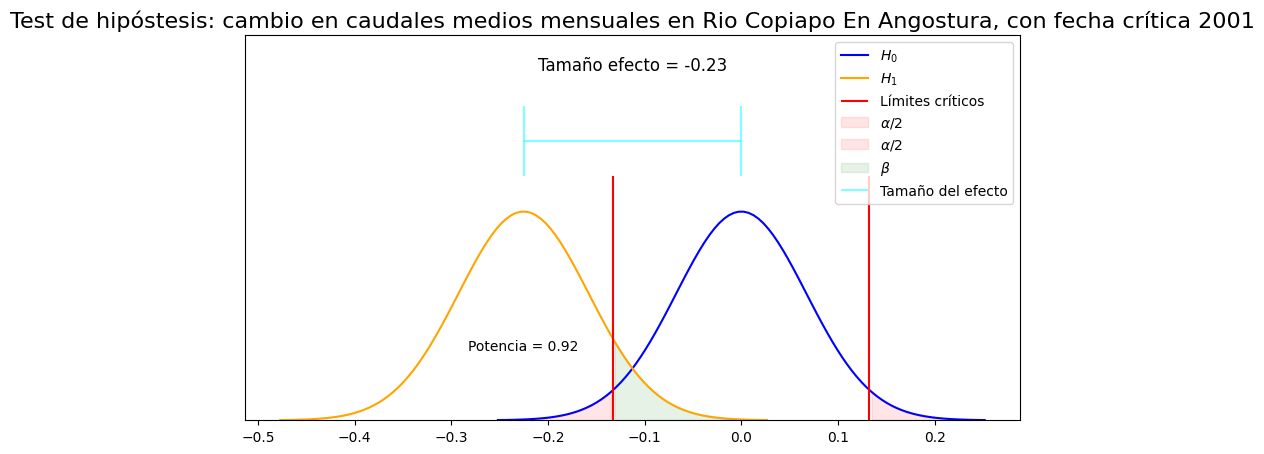


Estacion fluviométrica: Rio Copiapo En Ciudad De Copiapo
Data Histórica (1950-2025):             n= 901, mu = 0.65, sigma = 1.54
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.74, sigma = 1.75
Data después fecha crítica (2001-2025): n= 289, mu = 0.45, sigma = 0.95
Estimación gl: 883.34
T critico: 1.963
Varianza combinada: 2.363
Sigma población: 1.537
S diferencia medias: 0.090
IC diferencia medias al 0.950 NC: -0.468    -0.115
IC diferencia medias al 0.950 NC: -0.468   -0.115
T prueba: -3.245
p-value (significancia estadística): 1.9987829162
X promedio para T= 1.9626531828737783 :  -0.1764830933783483
Beta: 0.099963
Otra forma beta: 0.099963
Potencia de la prueba: 0.900037
d Cohen: -0.190
Diferencia bruta: -0.292


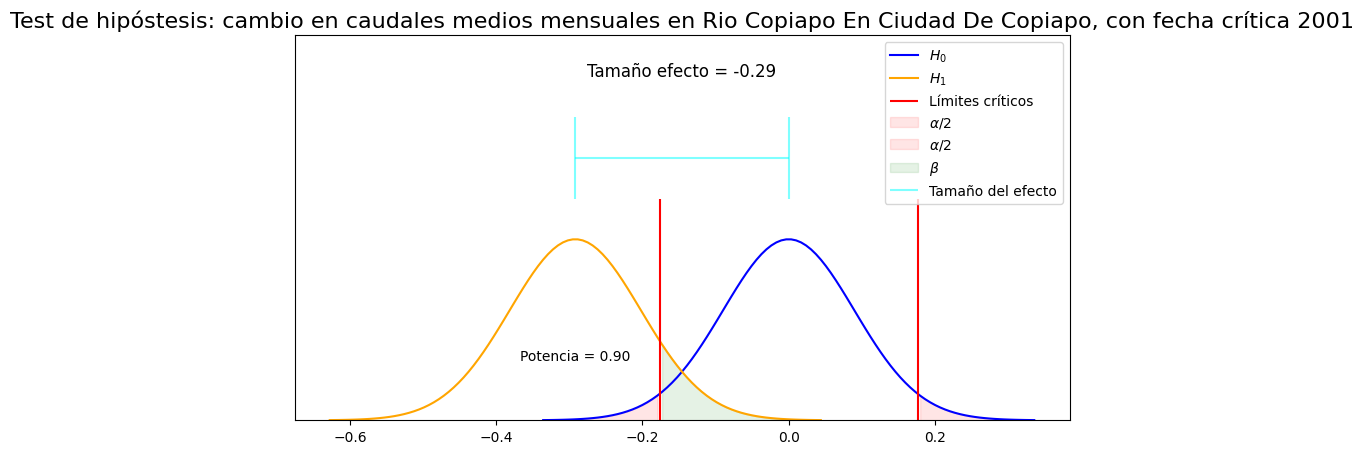


Estacion fluviométrica: Rio Copiapo En Mal Paso Aguas Abajo Canal
Data Histórica (1950-2025):             n= 901, mu = 0.62, sigma = 1.90
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.74, sigma = 2.11
Data después fecha crítica (2001-2025): n= 289, mu = 0.37, sigma = 1.35
Estimación gl: 819.76
T critico: 1.963
Varianza combinada: 3.600
Sigma población: 1.897
S diferencia medias: 0.116
IC diferencia medias al 0.950 NC: -0.602    -0.145
IC diferencia medias al 0.950 NC: -0.602   -0.145
T prueba: -3.208
p-value (significancia estadística): 1.9986122915
X promedio para T= 1.962862035061237 :  -0.22857620673734041
Beta: 0.106687
Otra forma beta: 0.106687
Potencia de la prueba: 0.893313
d Cohen: -0.197
Diferencia bruta: -0.374


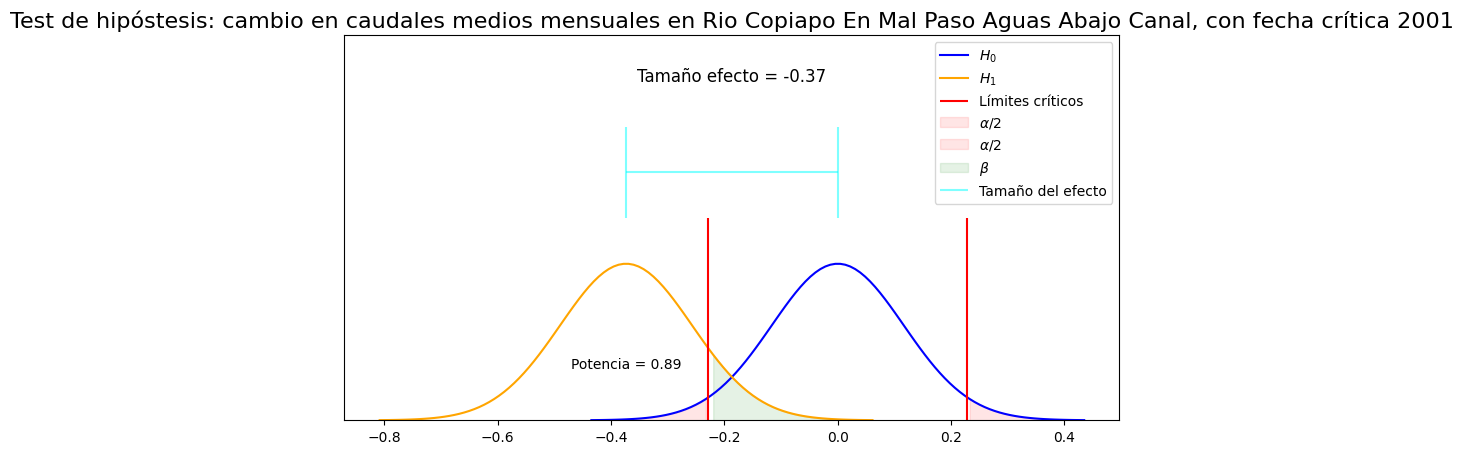


Estacion fluviométrica: Rio Copiapo En Mal Paso Aguas Arriba Canal
Data Histórica (1950-2025):             n= 901, mu = 1.25, sigma = 1.81
Data antes fecha crítica (1950-2001):   n= 612, mu = 1.40, sigma = 2.03
Data después fecha crítica (2001-2025): n= 289, mu = 0.93, sigma = 1.15
Estimación gl: 870.34
T critico: 1.963
Varianza combinada: 3.223
Sigma población: 1.795
S diferencia medias: 0.106
IC diferencia medias al 0.950 NC: -0.680    -0.262
IC diferencia medias al 0.950 NC: -0.680   -0.262
T prueba: -4.428
p-value (significancia estadística): 1.9999892560
X promedio para T= 1.9626933909704127 :  -0.20873186439952487
Beta: 0.006950
Otra forma beta: 0.006950
Potencia de la prueba: 0.993050
d Cohen: -0.262
Diferencia bruta: -0.471


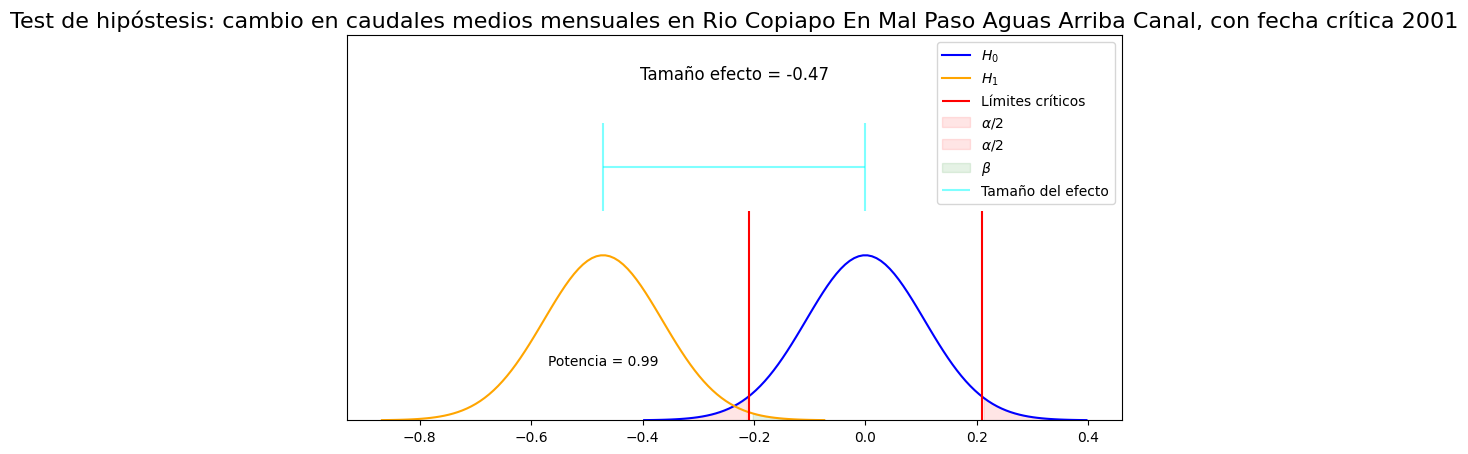


Estacion fluviométrica: Rio Copiapo En La Puerta
Data Histórica (1950-2025):             n= 901, mu = 2.06, sigma = 2.06
Data antes fecha crítica (1950-2001):   n= 612, mu = 2.29, sigma = 2.26
Data después fecha crítica (2001-2025): n= 289, mu = 1.56, sigma = 1.41
Estimación gl: 833.46
T critico: 1.963
Varianza combinada: 4.113
Sigma población: 2.028
S diferencia medias: 0.123
IC diferencia medias al 0.950 NC: -0.968    -0.483
IC diferencia medias al 0.950 NC: -0.968   -0.483
T prueba: -5.879
p-value (significancia estadística): 1.9999999940
X promedio para T= 1.9628143473420838 :  -0.24225011270757685
Beta: 0.000049
Otra forma beta: 0.000049
Potencia de la prueba: 0.999951
d Cohen: -0.358
Diferencia bruta: -0.726


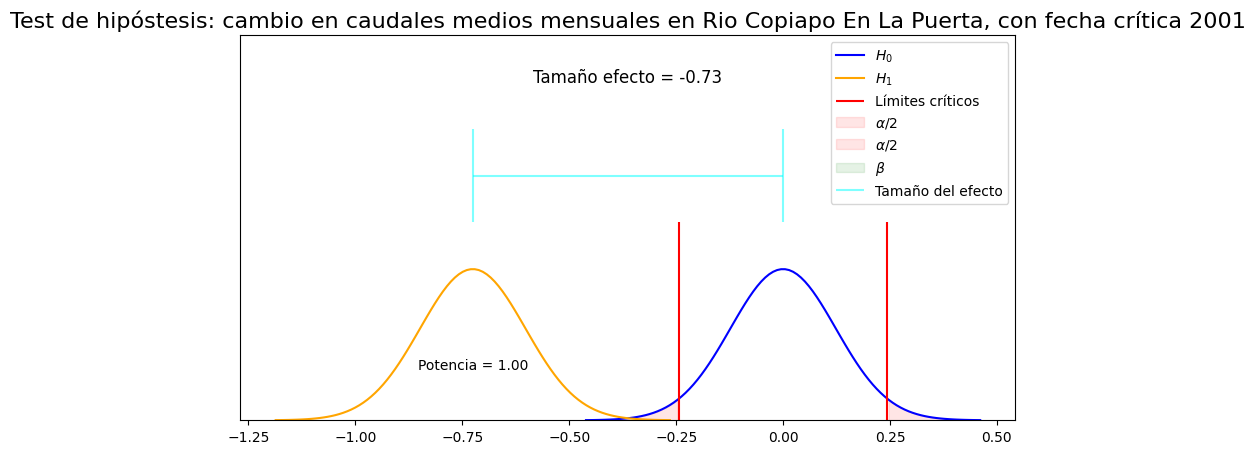


Estacion fluviométrica: Rio Copiapo En San Antonio
Data Histórica (1950-2025):             n= 901, mu = 1.54, sigma = 1.97
Data antes fecha crítica (1950-2001):   n= 612, mu = 1.71, sigma = 2.15
Data después fecha crítica (2001-2025): n= 289, mu = 1.18, sigma = 1.46
Estimación gl: 792.11
T critico: 1.963
Varianza combinada: 3.836
Sigma población: 1.959
S diferencia medias: 0.122
IC diferencia medias al 0.950 NC: -0.768    -0.288
IC diferencia medias al 0.950 NC: -0.768   -0.288
T prueba: -4.324
p-value (significancia estadística): 1.9999827017
X promedio para T= 1.9629633506992634 :  -0.23985370173888607
Beta: 0.009239
Otra forma beta: 0.009239
Potencia de la prueba: 0.990761
d Cohen: -0.270
Diferencia bruta: -0.528


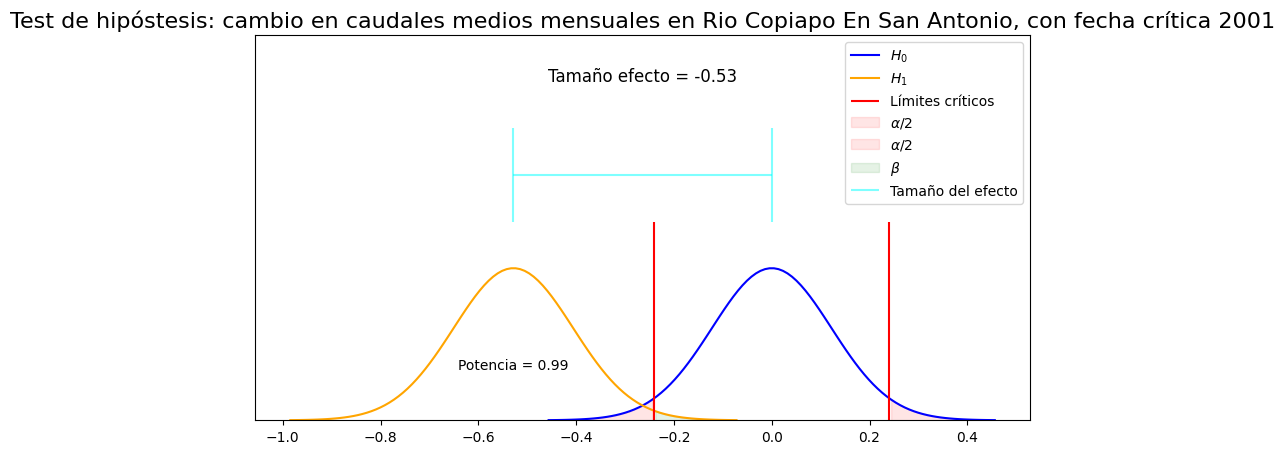


Estacion fluviométrica: Rio Copiapo En Lautaro
Data Histórica (1950-2025):             n= 901, mu = 1.13, sigma = 1.42
Data antes fecha crítica (1950-2001):   n= 612, mu = 1.26, sigma = 1.26
Data después fecha crítica (2001-2025): n= 289, mu = 0.87, sigma = 1.68
Estimación gl: 445.71
T critico: 1.965
Varianza combinada: 1.981
Sigma población: 1.408
S diferencia medias: 0.111
IC diferencia medias al 0.950 NC: -0.610    -0.173
IC diferencia medias al 0.950 NC: -0.610   -0.173
T prueba: -3.524
p-value (significancia estadística): 1.9995304906
X promedio para T= 1.965300714794954 :  -0.21856902665275502
Beta: 0.059923
Otra forma beta: 0.059923
Potencia de la prueba: 0.940077
d Cohen: -0.278
Diferencia bruta: -0.392


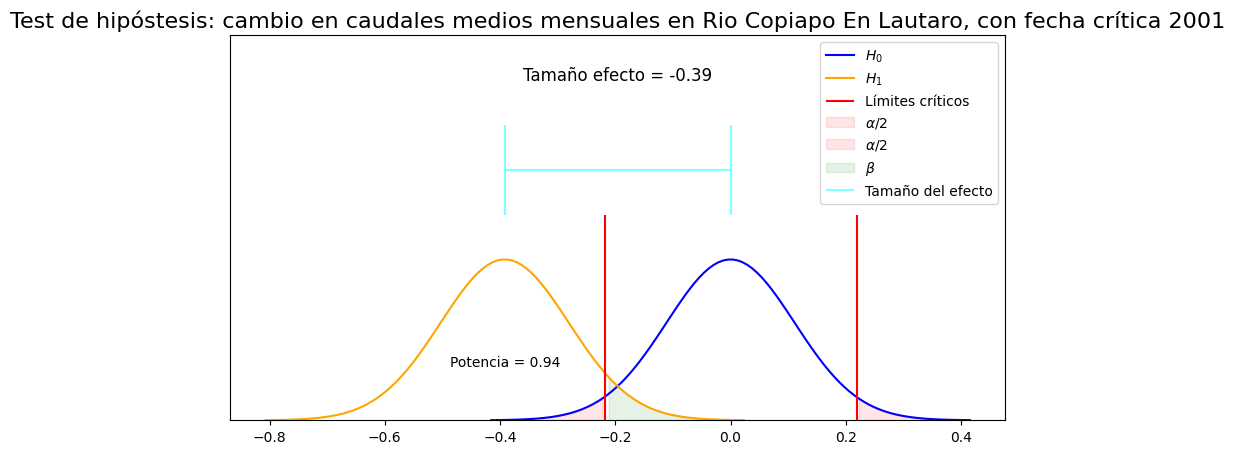


Estacion fluviométrica: Rio Copiapo En Pastillo
Data Histórica (1950-2025):             n= 901, mu = 2.11, sigma = 1.90
Data antes fecha crítica (1950-2001):   n= 612, mu = 2.22, sigma = 2.11
Data después fecha crítica (2001-2025): n= 289, mu = 1.88, sigma = 1.34
Estimación gl: 826.05
T critico: 1.963
Varianza combinada: 3.604
Sigma población: 1.899
S diferencia medias: 0.116
IC diferencia medias al 0.950 NC: -0.571    -0.115
IC diferencia medias al 0.950 NC: -0.571   -0.115
T prueba: -2.957
p-value (significancia estadística): 1.9968039087
X promedio para T= 1.9628399473912481 :  -0.22783848776586352
Beta: 0.160244
Otra forma beta: 0.160244
Potencia de la prueba: 0.839756
d Cohen: -0.181
Diferencia bruta: -0.343


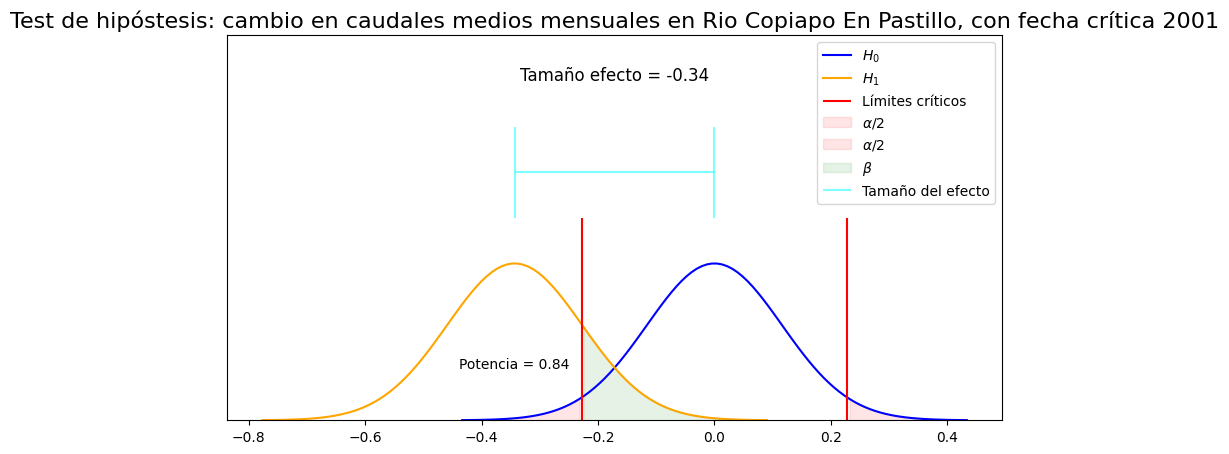


Estacion fluviométrica: Rio Jorquera En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 0.67, sigma = 0.58
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.70, sigma = 0.63
Data después fecha crítica (2001-2025): n= 289, mu = 0.60, sigma = 0.44
Estimación gl: 773.69
T critico: 1.963
Varianza combinada: 0.336
Sigma población: 0.579
S diferencia medias: 0.037
IC diferencia medias al 0.950 NC: -0.165    -0.021
IC diferencia medias al 0.950 NC: -0.165   -0.021
T prueba: -2.543
p-value (significancia estadística): 1.9888145674
X promedio para T= 1.9630349029425047 :  -0.07168756728030636
Beta: 0.281067
Otra forma beta: 0.281067
Potencia de la prueba: 0.718933
d Cohen: -0.160
Diferencia bruta: -0.093


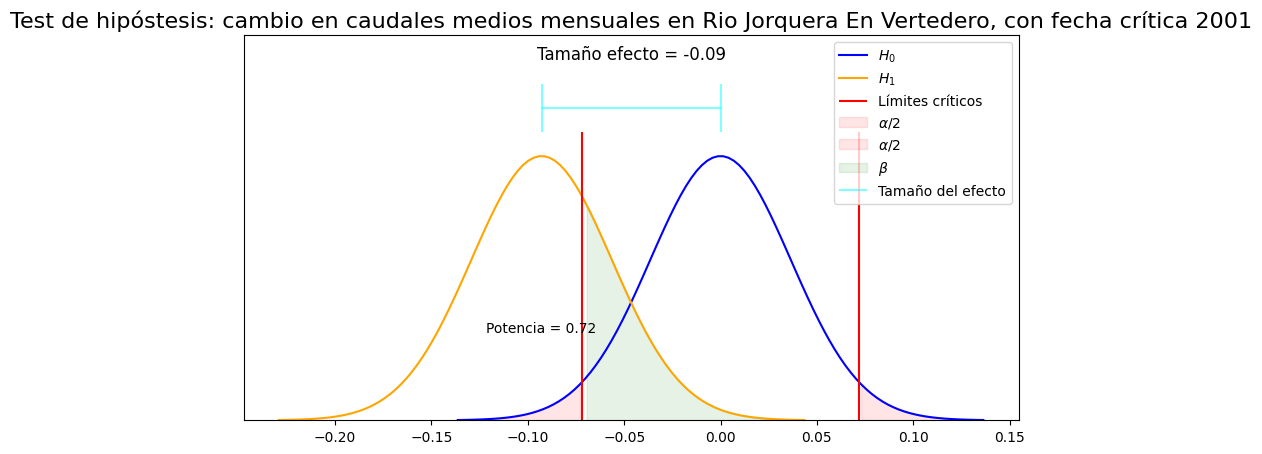


Estacion fluviométrica: Rio Pulido En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 1.41, sigma = 1.37
Data antes fecha crítica (1950-2001):   n= 612, mu = 1.46, sigma = 1.50
Data después fecha crítica (2001-2025): n= 289, mu = 1.29, sigma = 1.03
Estimación gl: 782.75
T critico: 1.963
Varianza combinada: 1.869
Sigma población: 1.367
S diferencia medias: 0.086
IC diferencia medias al 0.950 NC: -0.340    -0.003
IC diferencia medias al 0.950 NC: -0.340   -0.003
T prueba: -1.999
p-value (significancia estadística): 1.9540912281
X promedio para T= 1.9629992954700155 :  -0.1683039794910284
Beta: 0.485480
Otra forma beta: 0.485480
Potencia de la prueba: 0.514520
d Cohen: -0.125
Diferencia bruta: -0.171


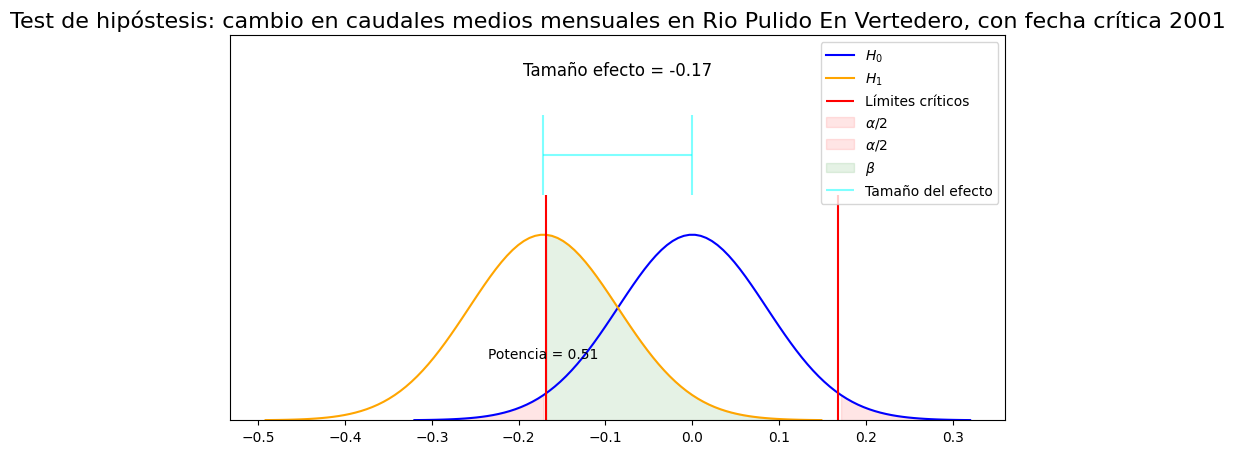


Estacion fluviométrica: Rio Manflas En Vertedero
Data Histórica (1950-2025):             n= 901, mu = 0.57, sigma = 0.83
Data antes fecha crítica (1950-2001):   n= 612, mu = 0.61, sigma = 0.94
Data después fecha crítica (2001-2025): n= 289, mu = 0.47, sigma = 0.52
Estimación gl: 875.50
T critico: 1.963
Varianza combinada: 0.689
Sigma población: 0.830
S diferencia medias: 0.049
IC diferencia medias al 0.950 NC: -0.241    -0.049
IC diferencia medias al 0.950 NC: -0.241   -0.049
T prueba: -2.954
p-value (significancia estadística): 1.9967815509
X promedio para T= 1.9626773009696599 :  -0.0960320006603106
Beta: 0.160845
Otra forma beta: 0.160845
Potencia de la prueba: 0.839155
d Cohen: -0.174
Diferencia bruta: -0.145


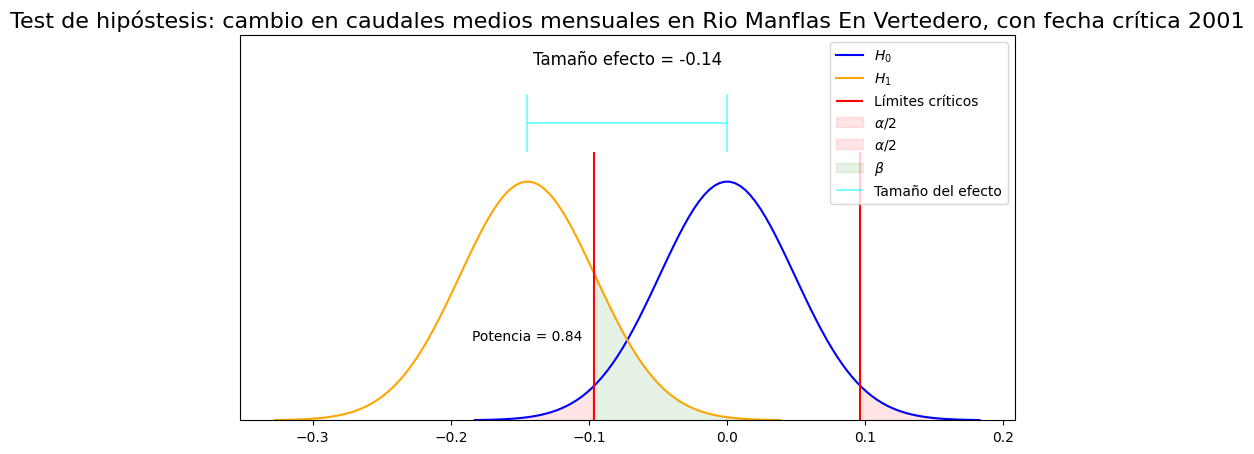

In [ ]:
for estac in estaciones:

  ## Se crean las muestras de control y experimental
  d = data[data["Estacion"]==estac]
  d_pre_fecha = np.array(d[d["Fecha"]<fecha_critica]["caudal m3/s"].to_list())
  d_post_fecha = np.array(d[d["Fecha"]>=fecha_critica]["caudal m3/s"].to_list())
  d = np.array(d["caudal m3/s"].to_list())


  ## Se calculan los estadisticos de las muestras
  mu = d.mean()
  sigma = d.std()
  normal = stats.norm(mu, sigma)
  x = np.linspace(d.min(), d.max(), 100)
  fdp = normal.pdf(x)
  n = len(d)

  mu_pre = d_pre_fecha.mean()
  sigma_pre = d_pre_fecha.std()
  normal_pre = stats.norm(mu_pre, sigma_pre)
  x_pre = np.linspace(d_pre_fecha.min(), d_pre_fecha.max(), 100)
  fdp_pre = normal_pre.pdf(x_pre)
  n_pre = len(d_pre_fecha)

  mu_post = d_post_fecha.mean()
  sigma_post = d_post_fecha.std()
  normal_post = stats.norm(mu_post, sigma_post)
  x_post = np.linspace(d_post_fecha.min(), d_post_fecha.max(), 100)
  fdp_post = normal_post.pdf(x_post)
  n_post = len(d_post_fecha)

  print()
  print(f"Estacion fluviométrica: {estac}")
  print(f"Data Histórica (1950-2025):             n= {n}, mu = {mu:.2f}, sigma = {sigma:.2f}")
  print(f"Data antes fecha crítica (1950-{fecha_critica.year}):   n= {n_pre}, mu = {mu_pre:.2f}, sigma = {sigma_pre:.2f}")
  print(f"Data después fecha crítica ({fecha_critica.year}-2025): n= {n_post}, mu = {mu_post:.2f}, sigma = {sigma_post:.2f}")

  # Análisis post hoc utilizando Z, con varianza desigual

  ## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)

  # muestra 1 (experimental)
  n_1 = n_post
  xbarra_1 = mu_post
  S_1 = sigma_post

  # muestra 2 (control)
  n_2 = n_pre
  xbarra_2 = mu_pre
  S_2 = sigma_pre

  ## 2) Determinar Nivel de Significancia
  alpha = 0.05

  ## 3) Estimar el IC de la diferencia de medias

  # Estimar grados de libertad cuando varianzas poblacionales no son iguales
  gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  (((S_1**2/n_1)**2 / (n_1-1)) + ((S_2**2/n_2)**2 / (n_2-1)))
  print(f'Estimación gl: {gl:4.2f}')

  # calcular T critico 2 colas con Scipy
  Tcritico = stats.t.ppf(1 - alpha/2, df=gl)
  print (f'T critico: {Tcritico:5.3f}')


  # Estimar ponderado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
  # Se aplica la varianza combinada para calcular 'd Cohen' en el último paso, por esta razón se calcula aquí:
  var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
  S = np.sqrt(var)
  print(f'Varianza combinada: {var:5.3f}')
  print(f'Sigma población: {S:5.3f}')

  # como las varianzas son diferentes, el cálculo del 'Sigma diferencias  medias' es de la siguiente forma:
  S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
  print(f'S diferencia medias: {S_dif:5.3f}')

  # IC diferencia medias al 1-alpha:
  LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
  LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
  print(f'IC diferencia medias al {1-alpha:5.3f} NC: {LI:5.3f}    {LS:5.3f}')

  # otra forma con Scipy
  IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
  print(f'IC diferencia medias al {1-alpha:5.3f} NC: {IC[0]:5.3f}   {IC[1]:5.3f}')

  ## 4) plantear hipótesis
  # H0:  Mu 1 = Mu 2
  # H1:  Mu 1 ≠ Mu 2

  # regla decisión (2 colas)
  # no rechazar H0 si: -Tcritico <= T <= Tcritico
  # rechazar HO si: T < -Tcritico o T > Tcritico

  ## 5) Calcular el estadístico T crítico a emplear
  Tcritico = Tcritico #fue obtenido en paso anterior

  ## 6) Determinar el tipo de test, una o dos colas.
  # como la hipòtesis alternativa es del tipo “diferente de” se trata de un test de dos colas

  ## 7 ) Calcular el estadístico T de prueba
  # como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
  T = ( xbarra_1 - xbarra_2 - 0) / S_dif
  print(f'T prueba: {T:5.3f}')

  ## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
  # calcular p-value
  pvalue = 1 - (stats.t.cdf(T, df=(gl))) # T prueba se encuentra en cola derecha
  print(f'p-value (significancia estadística): {pvalue*2:7.10f}') # 2 colas multiplicar por 2

  ## 9) Concluir prueba de hipótesis:
  # como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

  ## 10) Calcular la potencia de la prueba (1 - beta)

  # buscar el valor en días correspondiente al T critico
  x = 0 - (Tcritico * S_dif)# por la izquierda
  print('X promedio para T=',Tcritico,': ',x)

  # otra forma mas simple con Scipy usando ppf
  x_b = stats.t.ppf((alpha/2), df=gl , loc=0, scale=S_dif)
  # print('X promedio para T=',Tcritico,': ',x_b)


  # Calcular Beta (error tipo II)
  # forma simple con Scipy
  beta = 1-stats.t.cdf(x, df=gl, loc=xbarra_1-xbarra_2, scale=S_dif)
  print(f'Beta: {beta:5.6f}')

  # otra forma simple para calcular Beta con Scipy
  beta1 = stats.t.cdf(Tcritico+T, df= gl)
  print(f'Otra forma beta: {beta1:5.6f}')

  # Calcular Potencia estadística (1- beta)
  print(f'Potencia de la prueba: {1-beta:5.6f}')


  ## 11) Calcular el tamaño del efecto
  # aquí utilizaremos la desv. combinada (S pooled)
  # d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

  dif_bruta = (xbarra_1 - xbarra_2)
  dCohen = (xbarra_1 - xbarra_2) / S
  print(f'd Cohen: {dCohen:5.3f}')
  print(f'Diferencia bruta: {dif_bruta:5.3f}')

  # graficar
  #  Graficando la distribución de las diferencias de medias
  n = n_1 + n_2
  xbar = xbarra_1 - xbarra_2
  S_dif = S_dif

  # proyectar distribución diferencias medias (H1)
  dif_medias_H1 = stats.t(loc=xbar, scale=S_dif, df=(n-1))
  x = np.linspace(dif_medias_H1.ppf(0.0001), dif_medias_H1.ppf(0.9999), 100)
  pdf = dif_medias_H1.pdf(x) # función densidad probabilidad

  # proyectar distribución H0
  dif_medias_H0 = stats.t(loc=0, scale=S_dif, df=(n-1))
  x_m = np.linspace(dif_medias_H0.ppf(0.0001), dif_medias_H0.ppf(0.9999), 100)
  pdf_m = dif_medias_H0.pdf(x_m) #f unción densidad probabilidad

  plt.figure(figsize=(10, 5))
  plt.ylim(0, pdf.max()+5)

  plt.yticks([])

  plt.plot(x_m, pdf_m,"b",label=r'$H_0$' ) # dif medias H0 fit
  plt.plot(x, pdf,"orange", label=r'$H_1$') # dif medias H1 fit
  plt.vlines(ymin=0, ymax=pdf.max()+1, x=-Tcritico*S_dif,
            color='r') # LI IC
  plt.vlines(ymin=0, ymax=pdf.max()+1, x=Tcritico*S_dif,
            color='r', label='Límites críticos') # LS IC

  # Fill de 1 - alfa
  plt.fill_between(x_m, pdf_m,
                  where = (x_m < -Tcritico*S_dif),
                  color='r', alpha=0.1, label=r'$\alpha/2$')
  plt.fill_between(x_m, pdf_m,
                  where = (x_m > Tcritico*S_dif),
                  color='r', alpha=0.1, label=r'$\alpha/2$')
  # Fill de 1 - beta (Potencia)
  plt.fill_between(x, pdf,
                  where = (x > -Tcritico*S_dif),
                  color='g', alpha=0.1, label=r'$\beta$')
  # Tamaño del efecto
  plt.hlines(xmin=0, xmax=xbar, y=pdf.max()+2,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
  plt.vlines(ymin=pdf.max()+1, ymax=pdf.max()+3, x=0,  colors='cyan', alpha=0.5)
  plt.vlines(ymin=pdf.max()+1, ymax=pdf.max()+3, x=xbar,  colors='cyan', alpha=0.5)
  plt.text((xbar/2),pdf.max()+4, f'Tamaño efecto = {dif_bruta:4.2f}', fontsize=12, ha='center')

  # Anotaciones
  plt.text(xbar, pdf.max()/3, f'Potencia = {1-beta:4.2f}', ha='center')
  plt.legend(bbox_to_anchor=(1,1))

  plt.title(f'Test de hipóstesis: cambio en caudales medios mensuales en {estac}, con fecha crítica {fecha_critica.year}', fontsize=16)
  plt.show()

### Conclusión

Se observa que los caudales mendios mensuales han disminuído en el tiempo, tanto si se considera como fecha crítica el año 1991 o el año 2001.
Se observa tambien que para la fecha critica 2001, el efecto en la disminución de los caudales medios mensuales es mayor, es decir, en los últimos 25 años años la disminucón ha sido mayor que en los ultimos 35 años.